# **Introduction**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a Principal Component Analysis (PCA) transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.
- Features V1, V2, ... V28 are confidential features, the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature
- Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction
- Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# **1. Library importing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
pd.options.mode.chained_assignment = None
import matplotlib.font_manager
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from typing import Dict, List
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [2]:
!pip install --upgrade statsmodels
import statsmodels.api as sm


In [3]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [4]:
from sklearn.metrics import precision_recall_curve

In [5]:
#Data load
file_path = "/Users/panguyen277/Downloads/creditcard.csv"

df = pd.read_csv(file_path)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# **2. Data exploration analysis**

In [6]:
data = df.copy()

In [7]:
# Number of observations
num_observations = data.shape[0]
print("Number of observations in the dataframe:", num_observations)

Number of observations in the dataframe: 284807


In [8]:
# Dimension exploration
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 284807
Number of columns: 31


In [9]:
#Structural summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

So most of variables in dataframe is float, while class is integer. Also, there are no missing value in this dataset.

In [10]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

The data set contains 284,807 transactions. The mean value of all transactions is 88.35USD while the largest transaction recorded in this data set amounts to 25,691USD. However, as you might be guessing right now based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.

## **2.1. Class**

'Class' is an important feature in this dataset as it labels whether the transaction is normal transaction (Class 0) or fraud transaction (Class 1). In the EDA part, we first understand variable 'Class', then explore its relationships with other variables, including Amount, Time and other anonymous variables.

In [11]:
# Number of transactions under each class
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

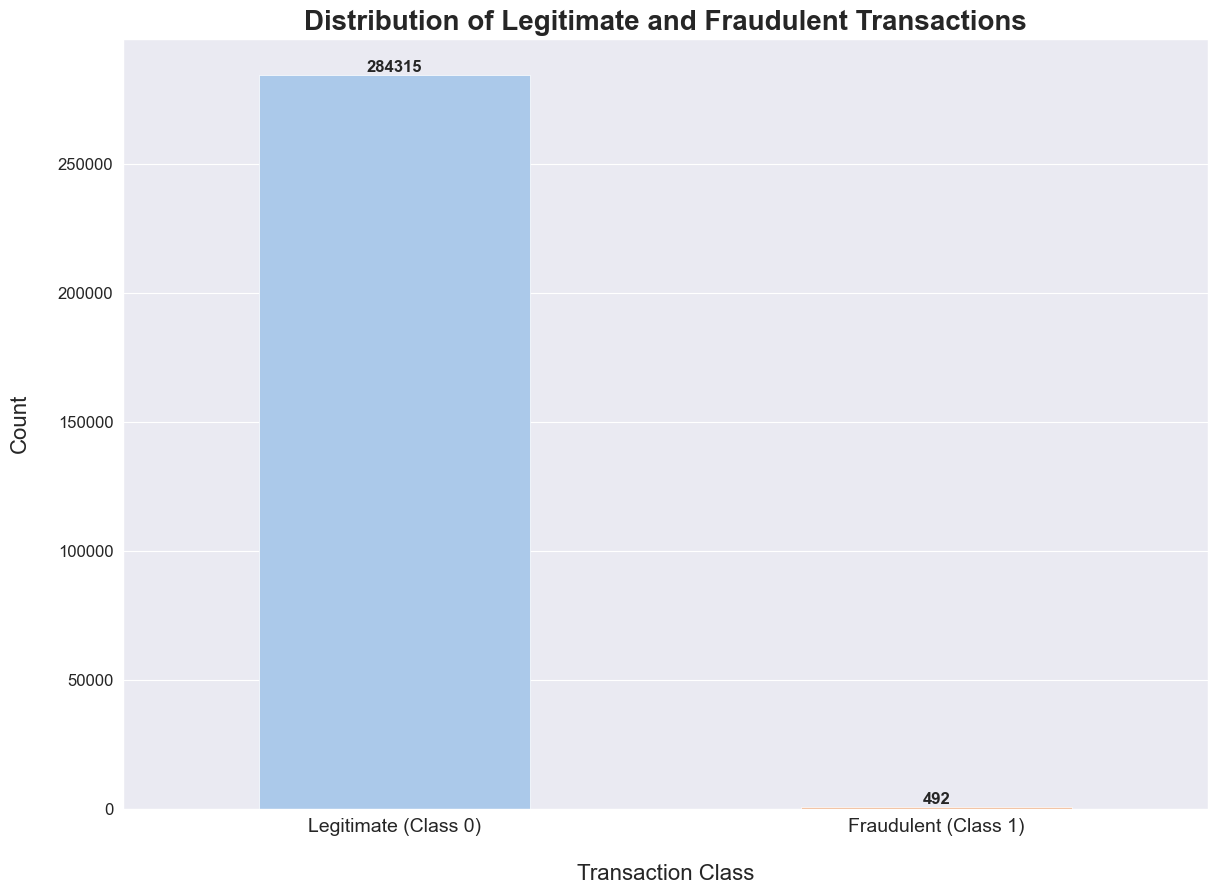

In [12]:
plt.figure(figsize=(14, 10))

# Set the graph
plt.rcParams['font.family'] = 'arial'

# Simple count plot (no hue, no legend arg)
ax = sns.countplot(x='Class', data=data, palette='pastel', width=0.5)

plt.title('Distribution of Legitimate and Fraudulent Transactions', fontsize=20, weight='bold')
plt.xlabel('Transaction Class', fontsize=16, labelpad=20)
plt.ylabel('Count', fontsize=16, labelpad=20)
plt.xticks([0, 1], ['Legitimate (Class 0)', 'Fraudulent (Class 1)'], fontsize=14)
plt.yticks(fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

A comparison of the transaction classes shows that there are 284,315 legitimate transactions (Class 0) and only 492 fraudulent transactions (Class 1). In percentage terms, fraudulent transactions make up only about 0.172% of the entire dataset. This analysis faces the limitations including a strong class imbalance, anonymized data limits interpretability, and the fact that the dataset reflects transactions from a single region and period. Hence, model generalization may be limited.

## **2.2. Amount by Class**

In [13]:
#Comparing Transaction Amounts

data.groupby('Class')['Amount'].describe()

count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

The summary shows that the mean of fraudulent transaction amount is higher than that of legitimate one. However, the median of fraudulent transaction amount is approximately 9.25 indicating large discrepancy between the mean and median. This means that most fraudulent transactions involve small amounts, but a few extremely large transactions are pulling the mean upwards.  

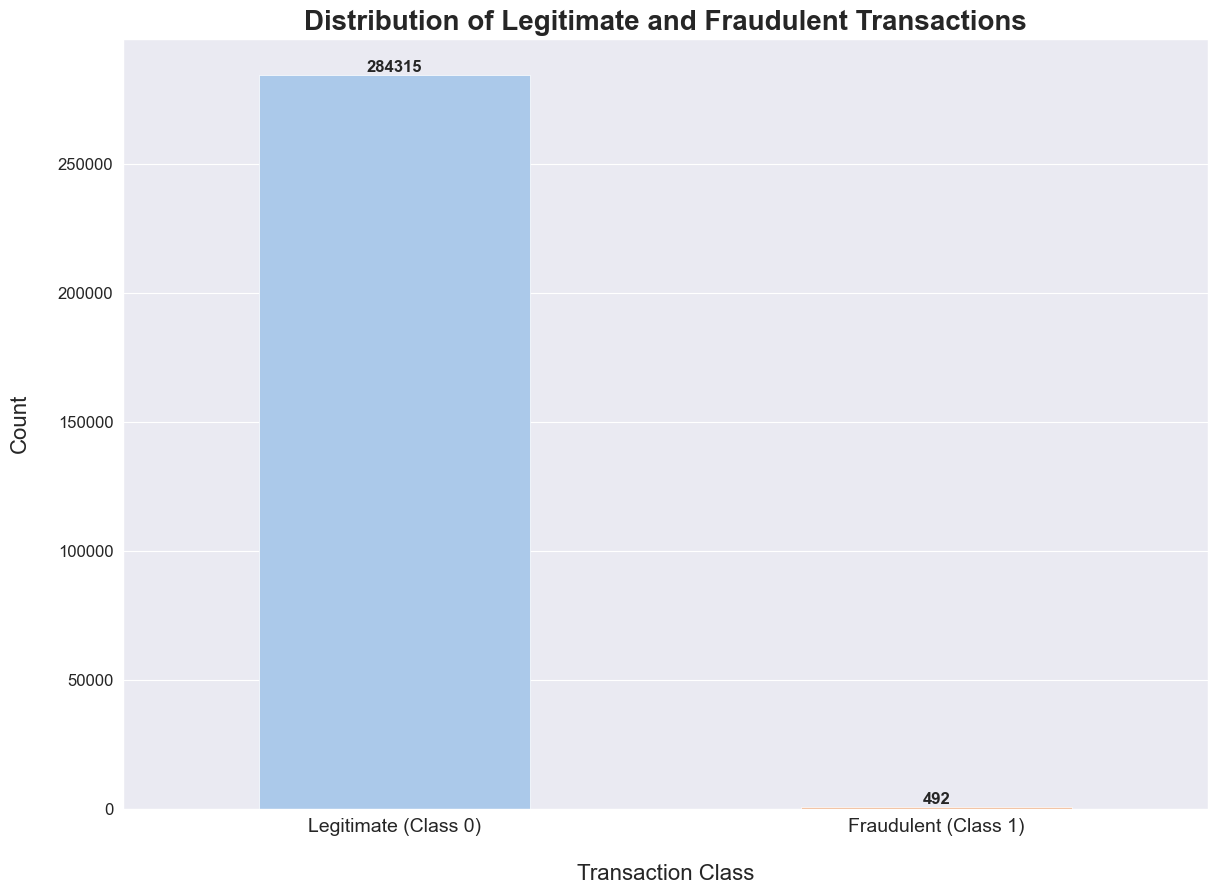

In [15]:
plt.figure(figsize=(14, 10))

# Set the graph
plt.rcParams['font.family'] = 'arial'

# Simple count plot (no hue, no legend arg)
ax = sns.countplot(x='Class', data=data, palette='pastel', width=0.5)

plt.title('Distribution of Legitimate and Fraudulent Transactions', fontsize=20, weight='bold')
plt.xlabel('Transaction Class', fontsize=16, labelpad=20)
plt.ylabel('Count', fontsize=16, labelpad=20)
plt.xticks([0, 1], ['Legitimate (Class 0)', 'Fraudulent (Class 1)'], fontsize=14)
plt.yticks(fontsize=12)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

Due to the wide range of the ‘Amount’ feature, both the boxplot and histogram use a logarithmic scale for clearer visualization. The boxplot reveals the stability of legitimate transactions. The interquartile range (IQR, the middle 50% of data) of legitimate transactions is concentrated in a relatively narrow value range. This suggests consistent and predictable spending pattern for normal transactions. In contrast, the IQR of fraudulent transactions is very widespread, ranging from around 1 to over 100. This indicates that fraudulent behavior is inconsistent and more random in terms of transaction value

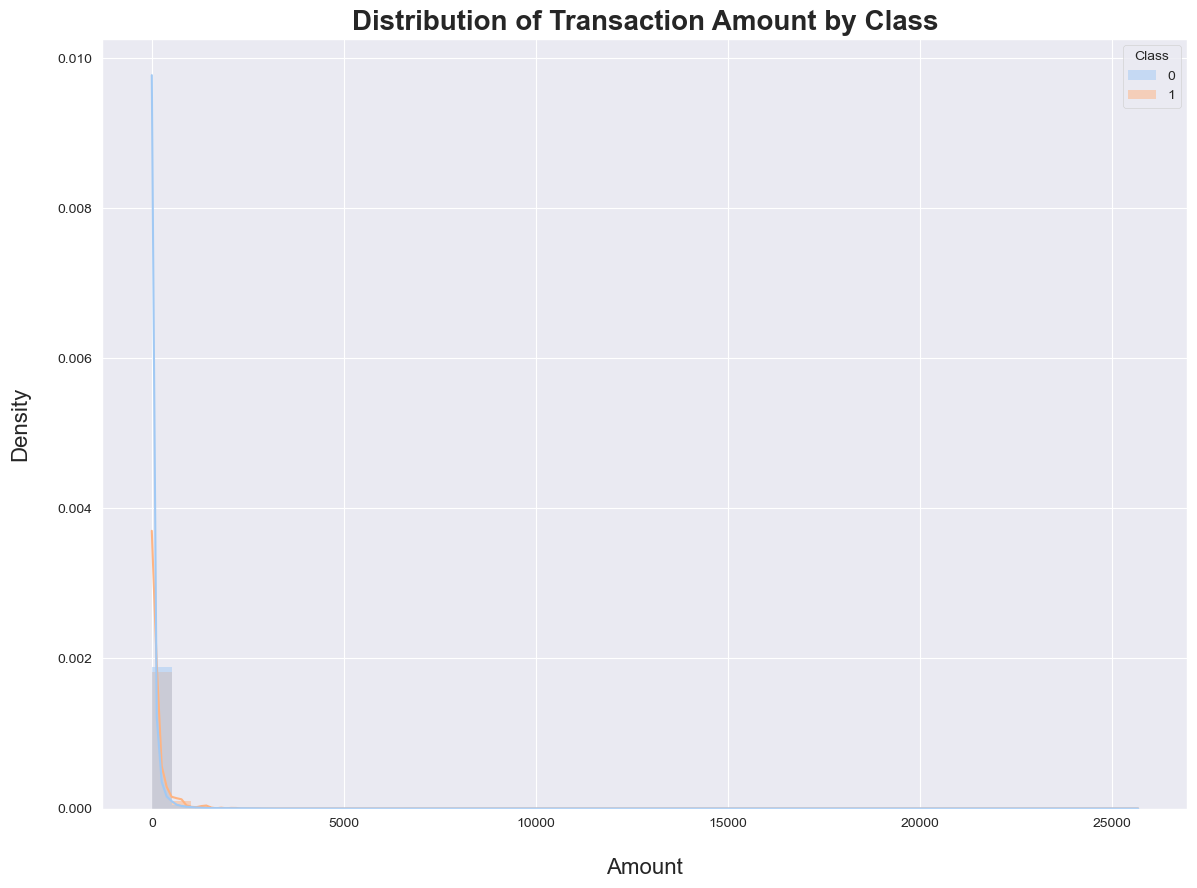

In [ ]:
# Create a distribution plot for 'Amount' by 'Class'
plt.figure(figsize=(14, 10))
sns.histplot(data=data, x='Amount', hue='Class', palette='pastel', bins=50, kde=True, stat='density', common_norm=False, edgecolor='none')

#Adding Title and Lable
plt.title('Distribution of Transaction Amount by Class', fontsize=20, weight='bold')
plt.xlabel('Amount', fontsize=16, labelpad=20)
plt.ylabel('Density', fontsize=16, labelpad=20)

plt.show()

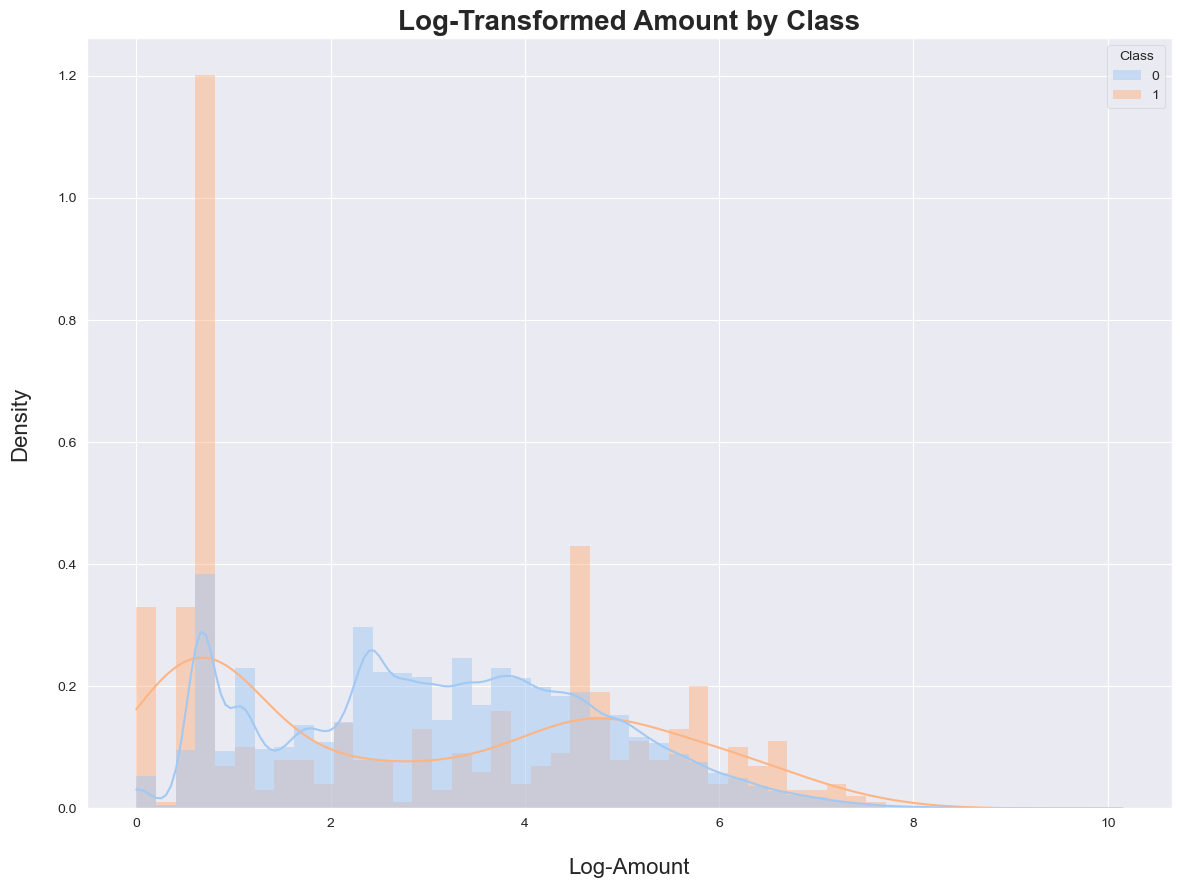

In [ ]:
plt.figure(figsize=(14, 10))

#Log Transformation
data['LogAmount'] = np.log1p(data['Amount'])  # log(Amount + 1) to handle zeros
sns.histplot(data=data, x='LogAmount', hue='Class', palette='pastel', bins=50, kde=True, stat='density', common_norm=False, edgecolor='none')

#Adding Title and Lable
plt.title('Log-Transformed Amount by Class', fontsize=20, weight='bold')
plt.xlabel('Log-Amount', fontsize=16, labelpad=20)
plt.ylabel('Density', fontsize=16, labelpad=20)

plt.show()

Fraudulent transactions have an irregular distribution, with a high frequency of small-amount transactions and several significant spikes at high-amount transactions. This pattern likely indicates a fraudulent strategy to test card validation by making small-amount transactions, followed by a few high-amount transaction in terms of maximizing profit before the card is blocked.

## **2.3. Time by Class**

In [ ]:
#Comparing Transactions Time

data.groupby('Class')['Time'].describe()

count          mean           std    min      25%      50%  \
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

            75%       max  
Class                      
0      139333.0  172792.0  
1      128483.0  170348.0

An analysis of the ‘Time’ feature finds the mean time for fraudulent is lower than that of legitimate one. This is the first indication that fraudulent transactions, on average, tend to occur earlier in this two-day observation period. This trend is confirmed by the median values where half of all fraudulent transactions occurred before second 75,568.50, whereas for legitimate transactions occurred later at second 84.

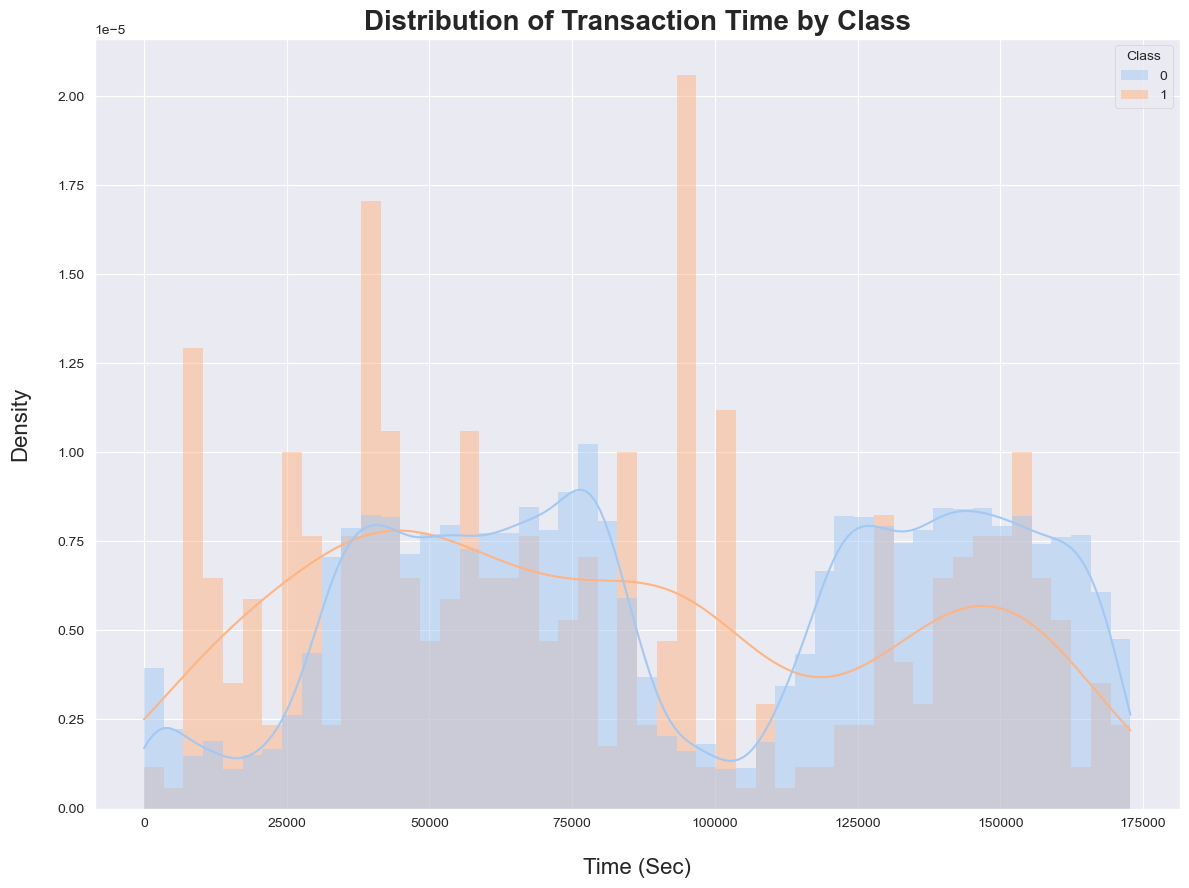

In [ ]:
plt.figure(figsize=(14, 10))

#Histogram
sns.histplot(data=data, x='Time', hue='Class', bins=50, kde=True, stat='density', common_norm=False, palette='pastel', edgecolor='none')

#Adding Title and Lable
plt.title('Distribution of Transaction Time by Class', fontsize=20, weight='bold')
plt.xlabel('Time (Sec)', fontsize=16, labelpad=20)
plt.ylabel('Density', fontsize=16, labelpad=20)

plt.show()

Legitimate transactions appear to have a stable pattern, reflecting a normal activity where high volume of transactions is made during daylight hours. In contrast to fraudulent transactions, the distribution pattern presents random and has an inverse pattern. To properly analyse this daily cycle, it is necessary to convert the ‘Time’ feature to represent the hour of the day to capture the cyclical nature of human behaviour

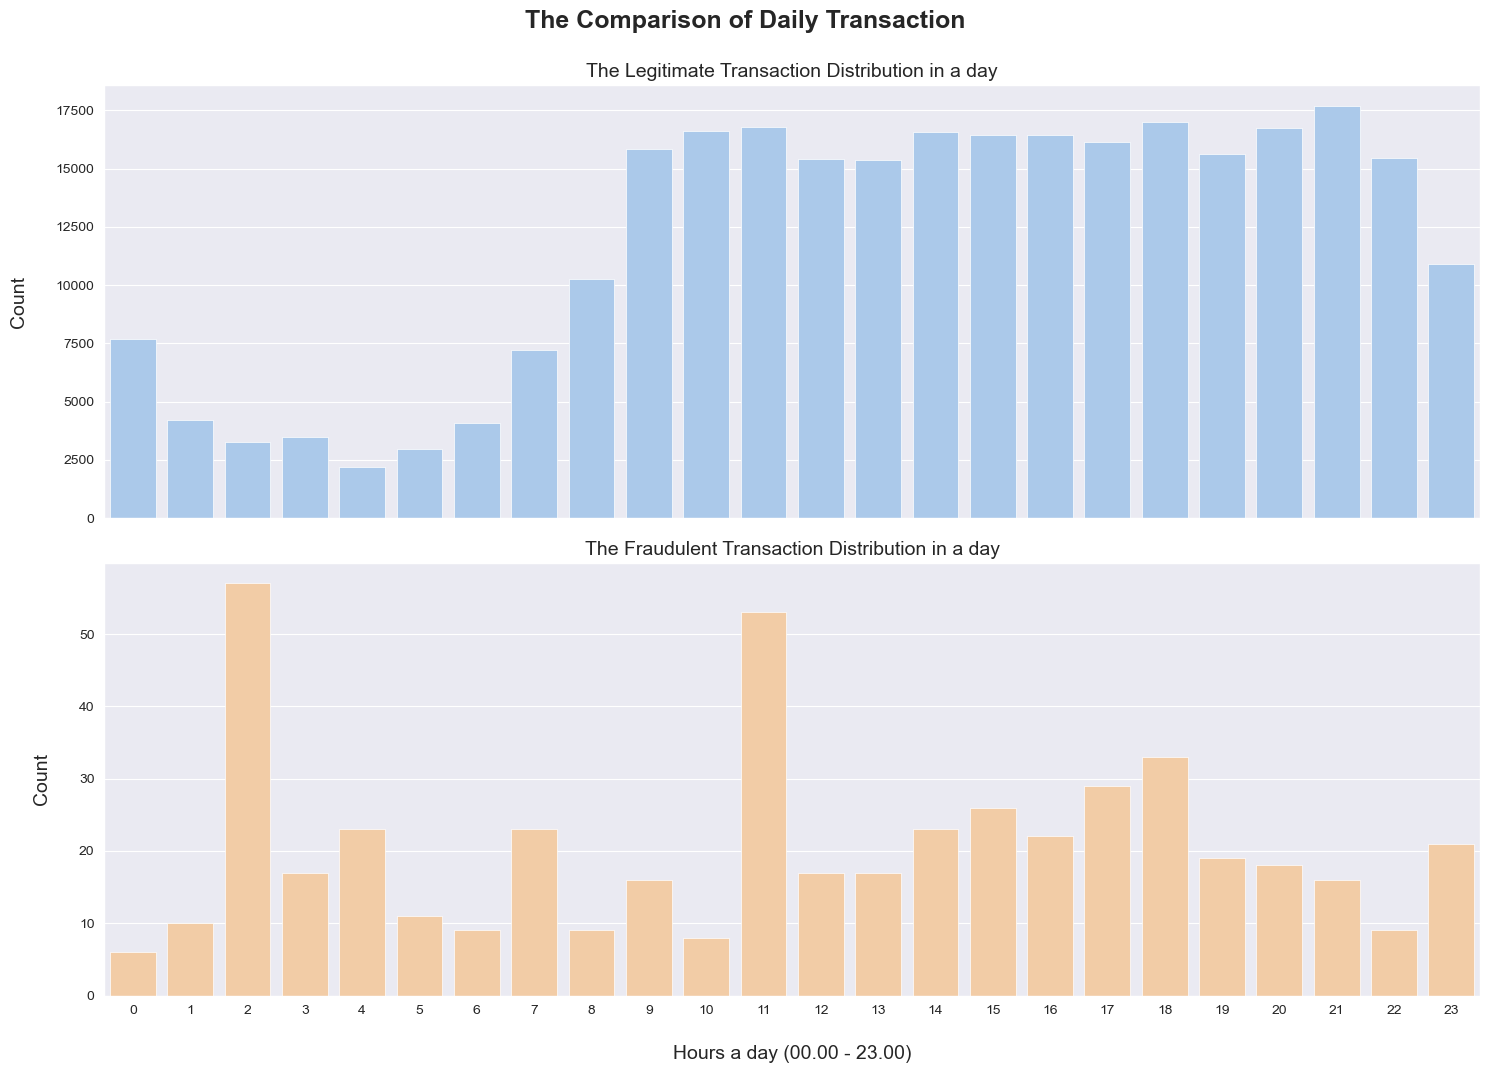

In [ ]:
#Daily Transaction Comparison

# Calculate seconds in 24 hours (86400 seconds = 24 hours)
seconds_in_day = data['Time'] % 86400
data['Hour_of_Day'] = (seconds_in_day // 3600).astype(int)

#Data Visualization
#Divide graph for 0 and 1
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
#Plot for legitimate transactions (0)
sns.countplot(x='Hour_of_Day', data=data[data['Class'] == 0], ax=ax1, color='#a1c9f4')
ax1.set_title('The Legitimate Transaction Distribution in a day', fontsize=14)
ax1.set_ylabel('Count', fontsize=14, labelpad=20)
ax1.set_xlabel('')
#Plot for Fraudulent transactions (1)
sns.countplot(x='Hour_of_Day', data=data[data['Class'] == 1], ax=ax2, color='#FFCC99', legend=0)
ax2.set_title('The Fraudulent Transaction Distribution in a day', fontsize=14)
ax2.set_xlabel('Hours a day (00.00 - 23.00)', fontsize=14, labelpad=20)
ax2.set_ylabel('Count', fontsize=14, labelpad=20)
#Adding Title and lable
plt.suptitle('The Comparison of Daily Transaction', fontsize=18, y=0.92, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.92])

plt.show()

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone. The data shows a clear peak in fraudulent transactions around 02.00 AM, when human activity is minimal. However, relying solely on this pattern would be misleading. Fraudulent transactions also occur during peak hours, as seen at 11.00 AM and in the afternoon. This suggests that analysis by hour of the day is unreliable feature for detecting fraud, as transactions happen during both peak and off-peak hours.

## **2.3. PCA Variables**

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0,);
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);


As can see, some of our predictors do seem to be correlated with the Class variable. Nonetheless, there seem to be relatively little significant correlations for such a big number of variables. This can probably be attributed to two factors:

- The data was prepared using a PCA, therefore our predictors are principal components.
- The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

Because the correlation between variables and 'Class' are so small, the project choosed significant variables are the ones that have correlations with ‘Class’ ≥ 0.1.

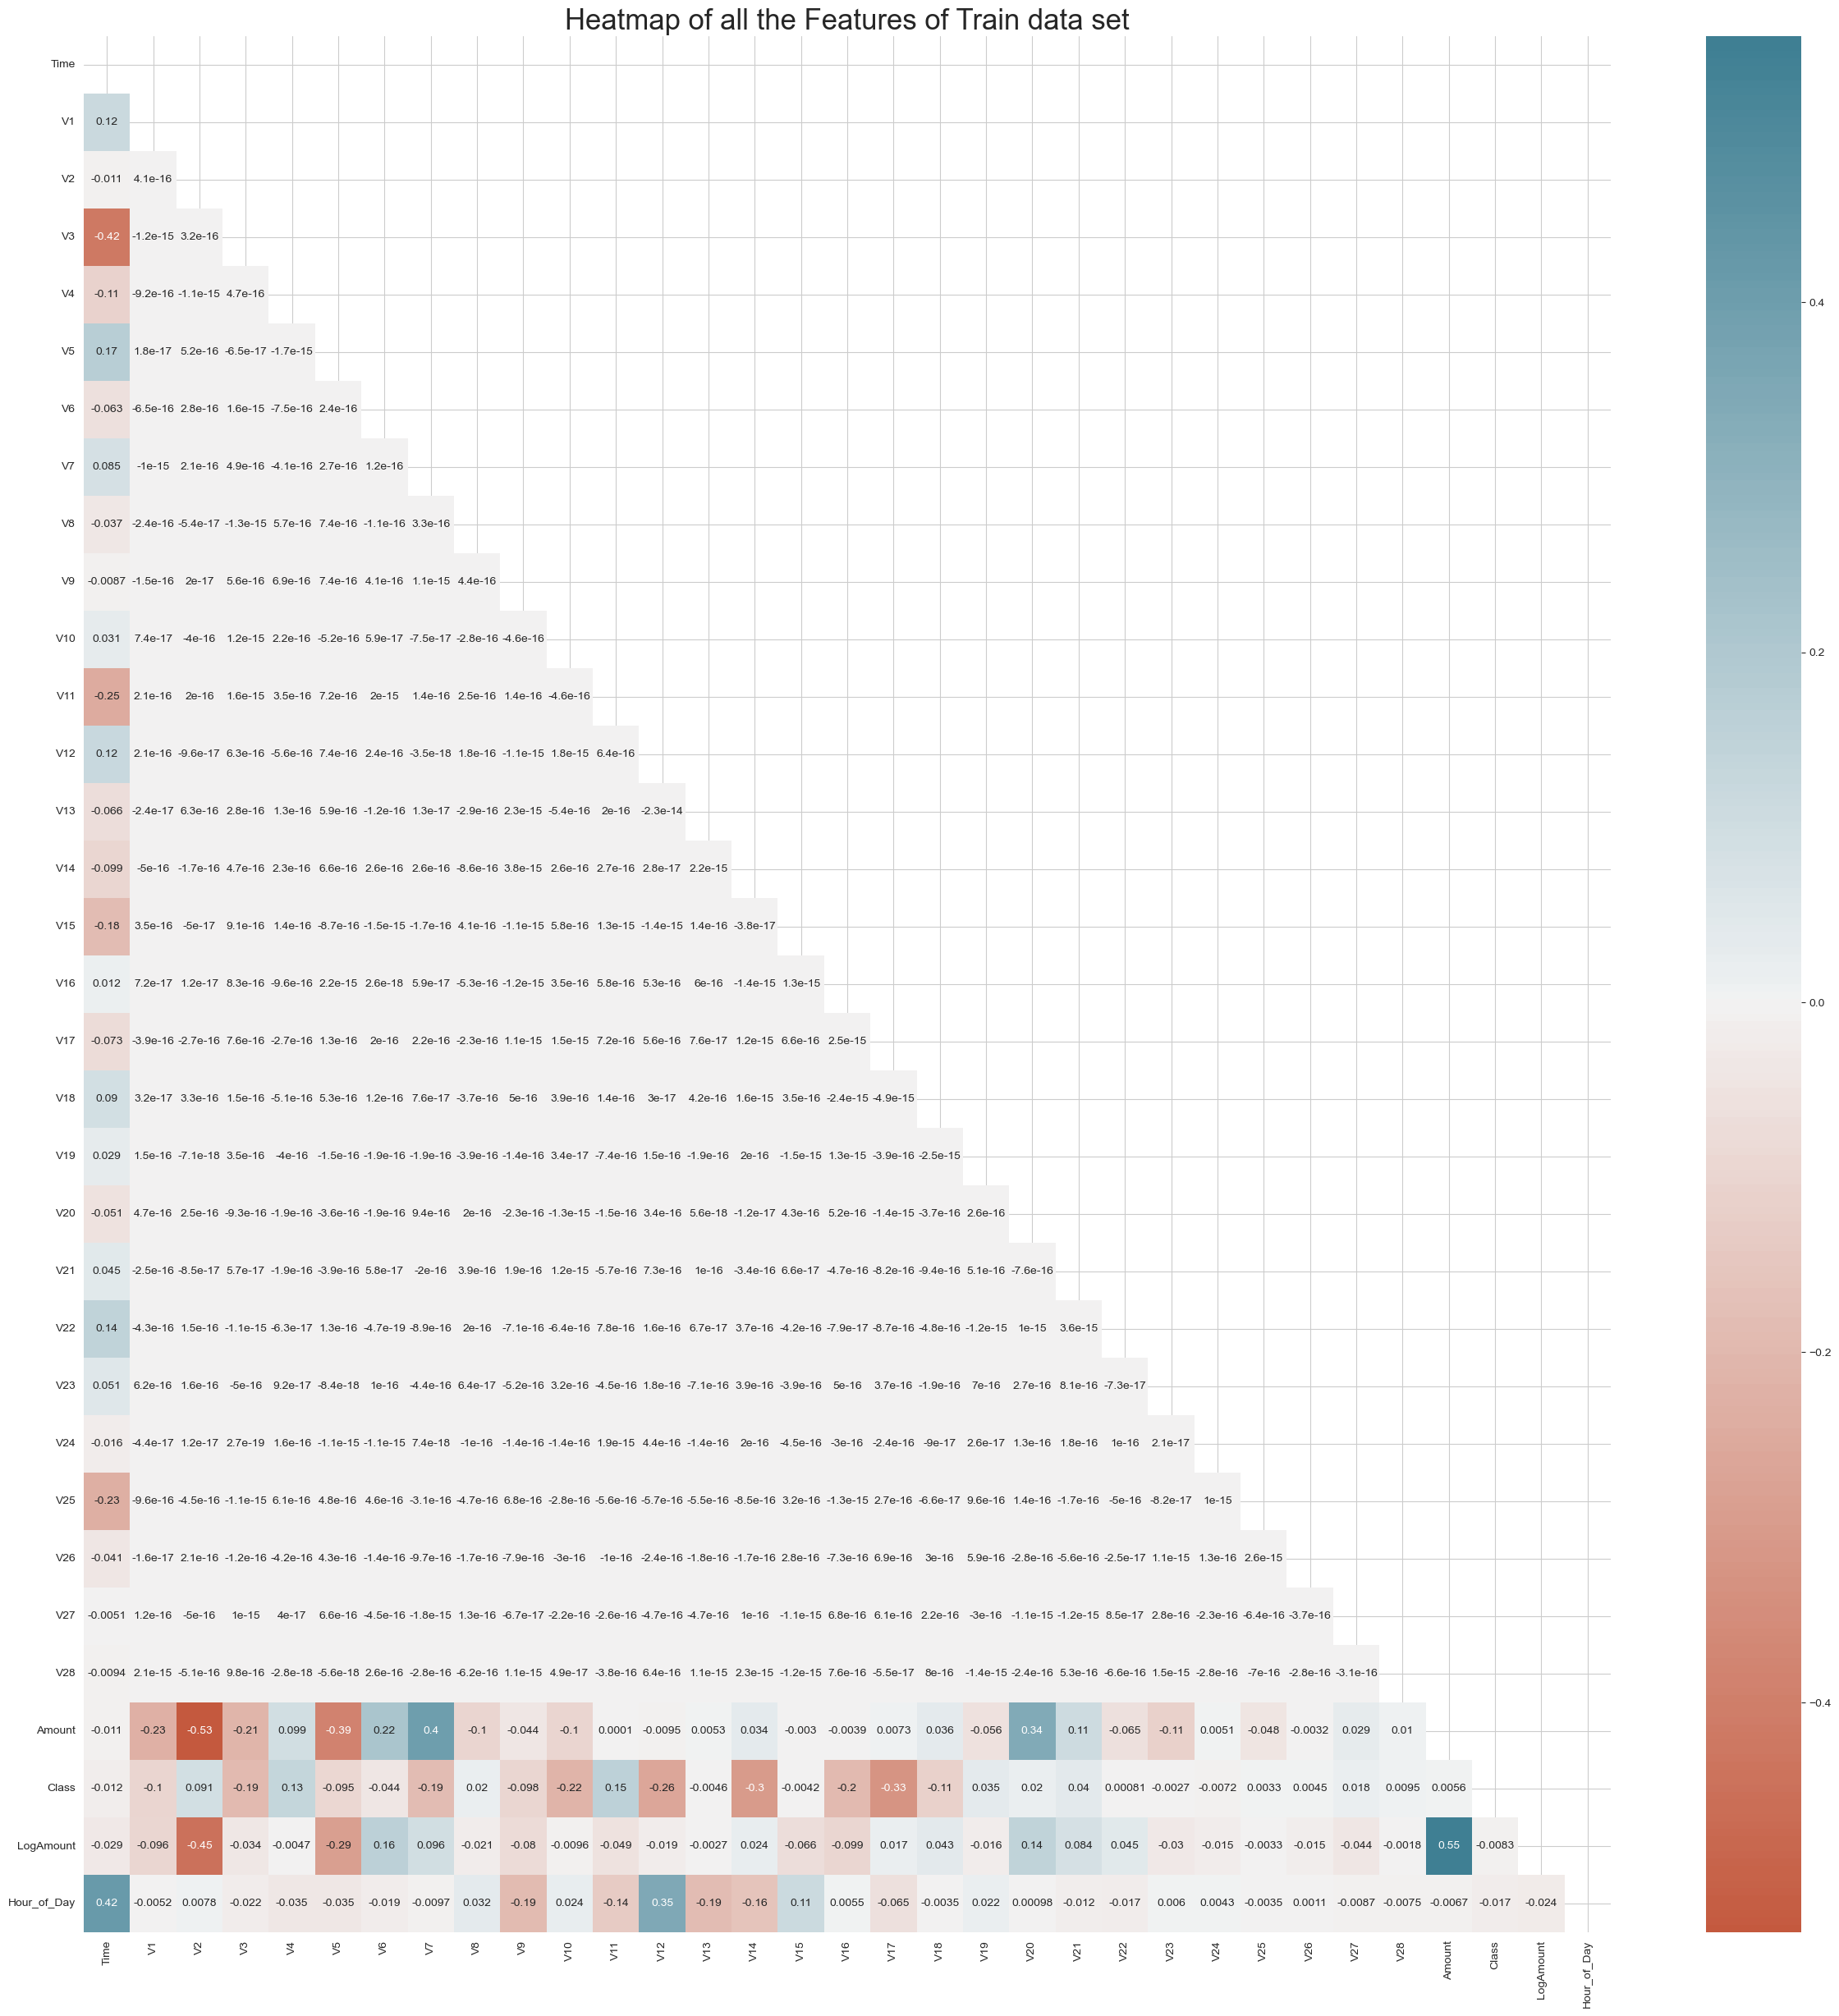

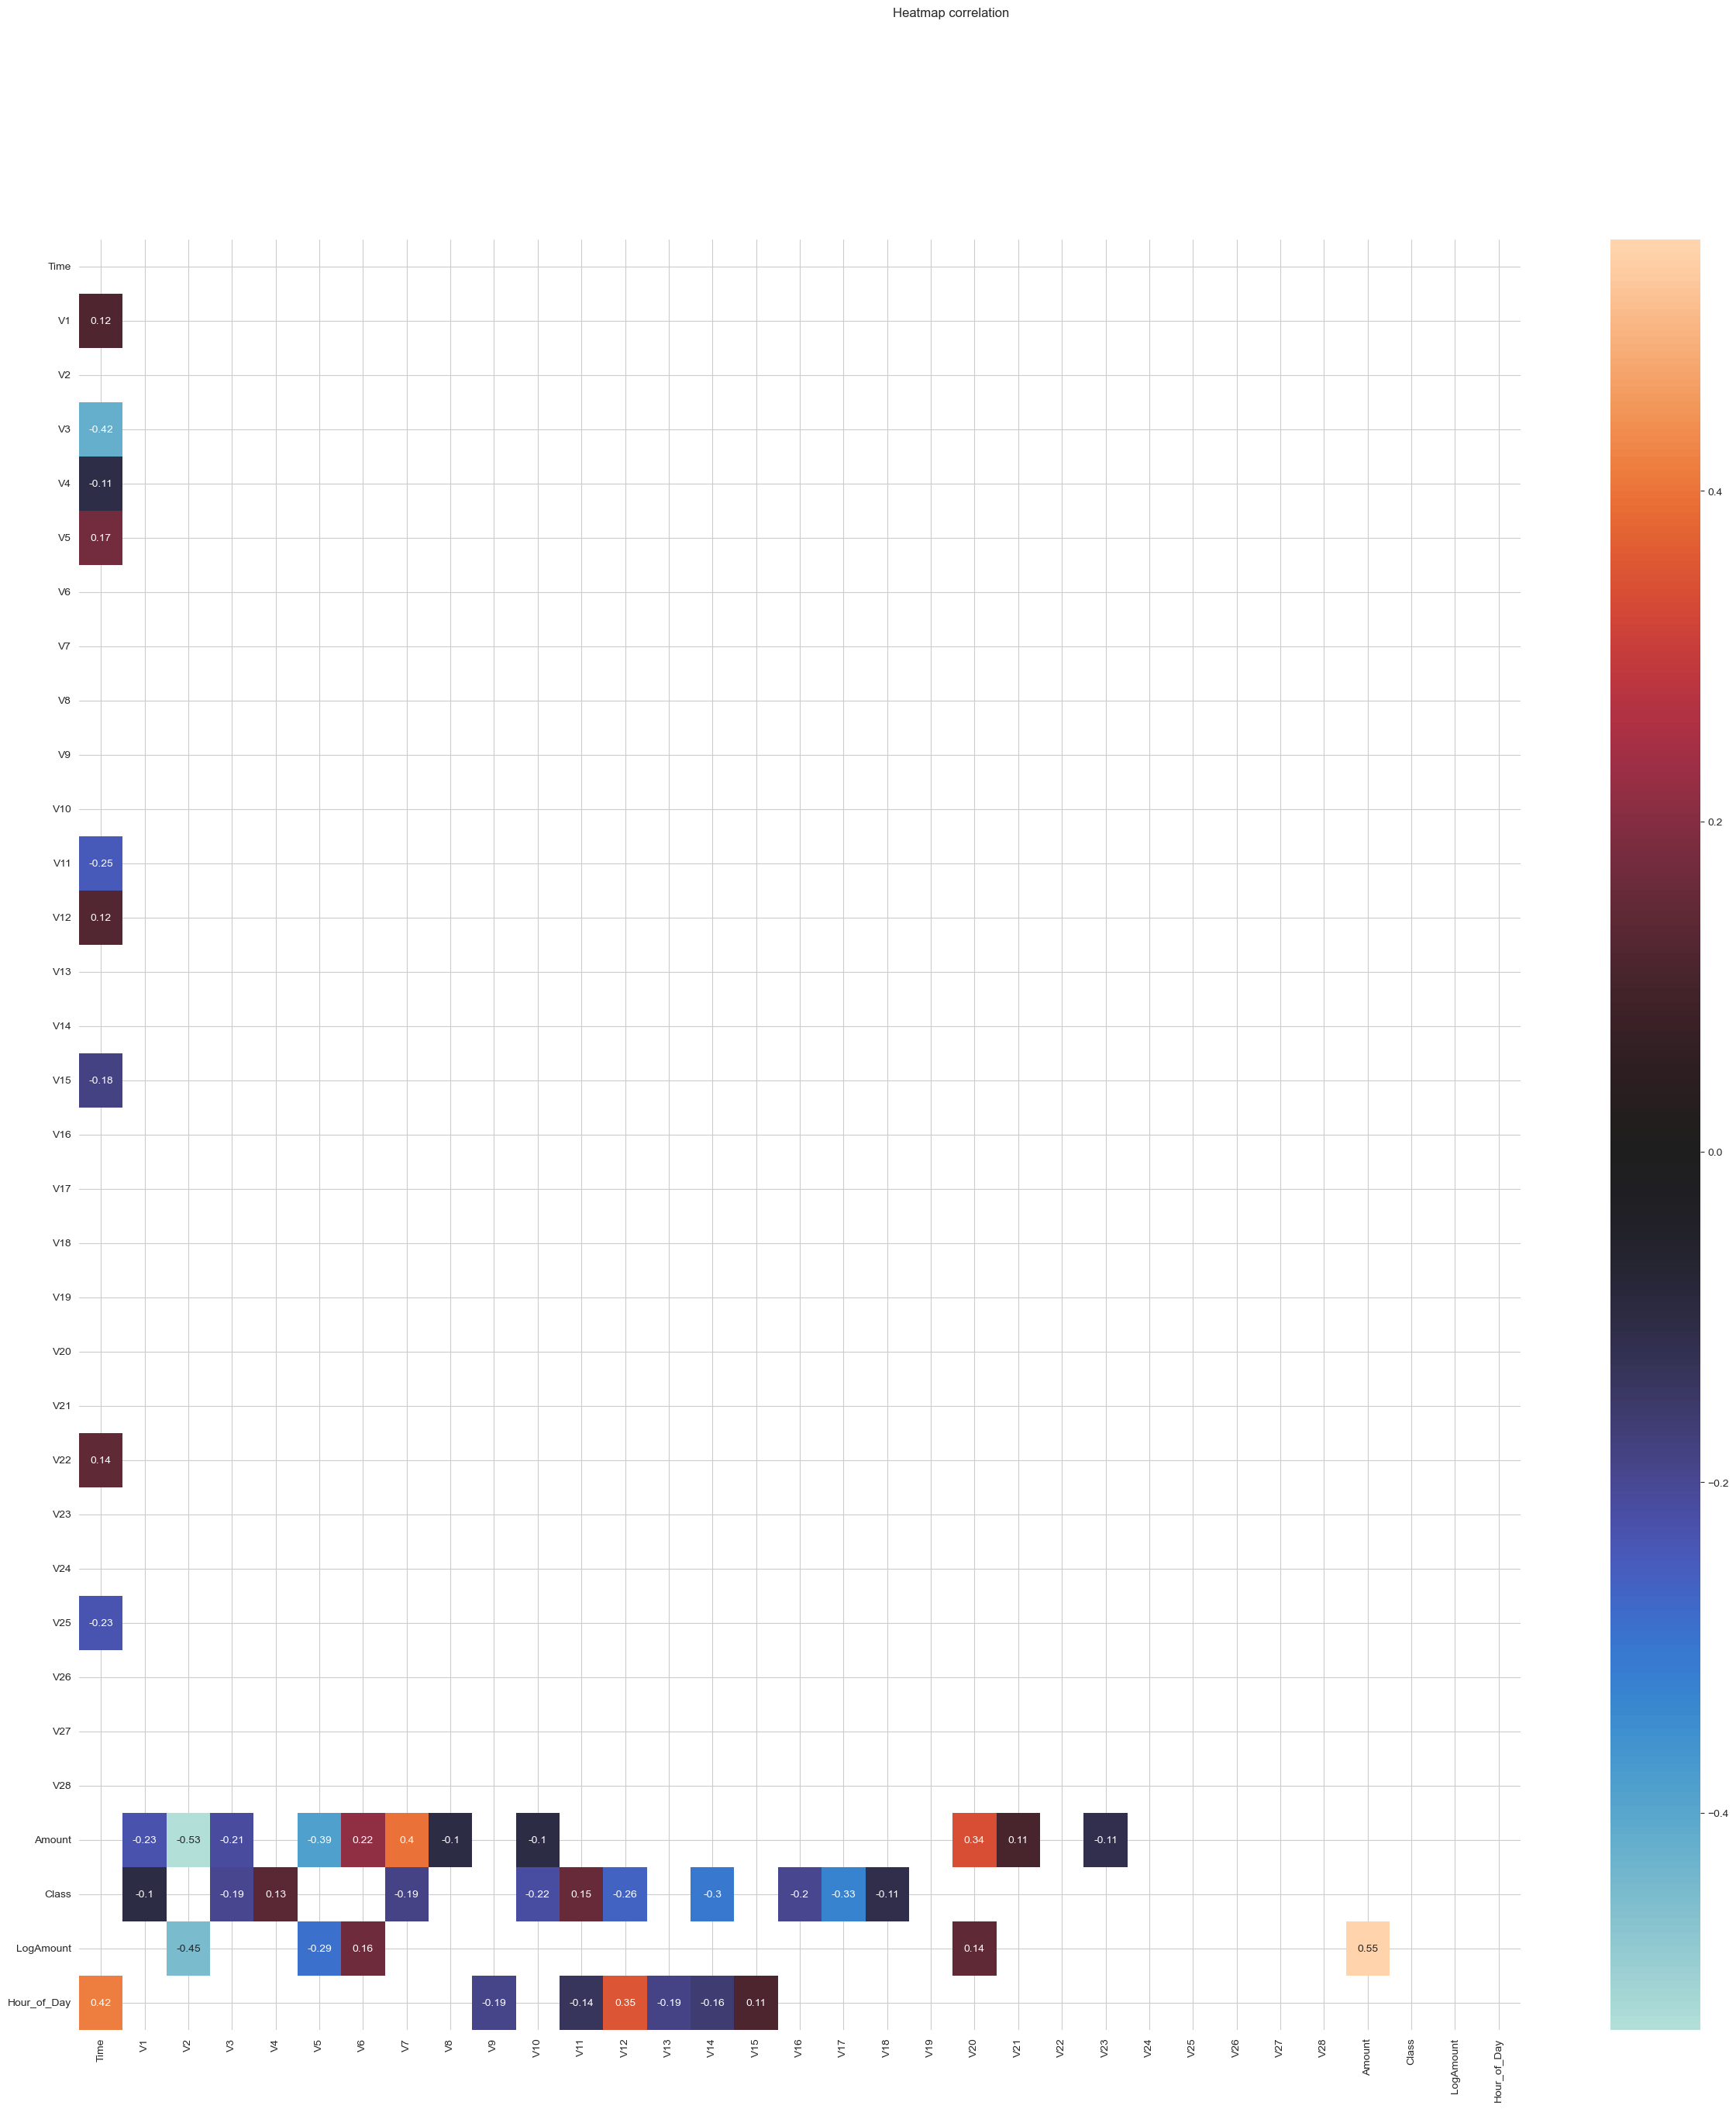

In [ ]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap((corr[(corr>=0.1) |(corr <=-0.1)]), mask=np.triu(corr),annot=True,center = 0,cmap="icefire")
plt.suptitle('Heatmap correlation')
plt.show()

We can see that V17 and V14 are the two variables that most related to the Class with the absolute correlations ≥ 0.3. Other important features are V1, V3, V4, V7, V10, V11, V12, V14, V16. V17, V18.

These findings suggest that simple linear models or static rule-based systems will likely be ineffective. Hence, the use of advanced, non-linear machine learning algorithms is essential.

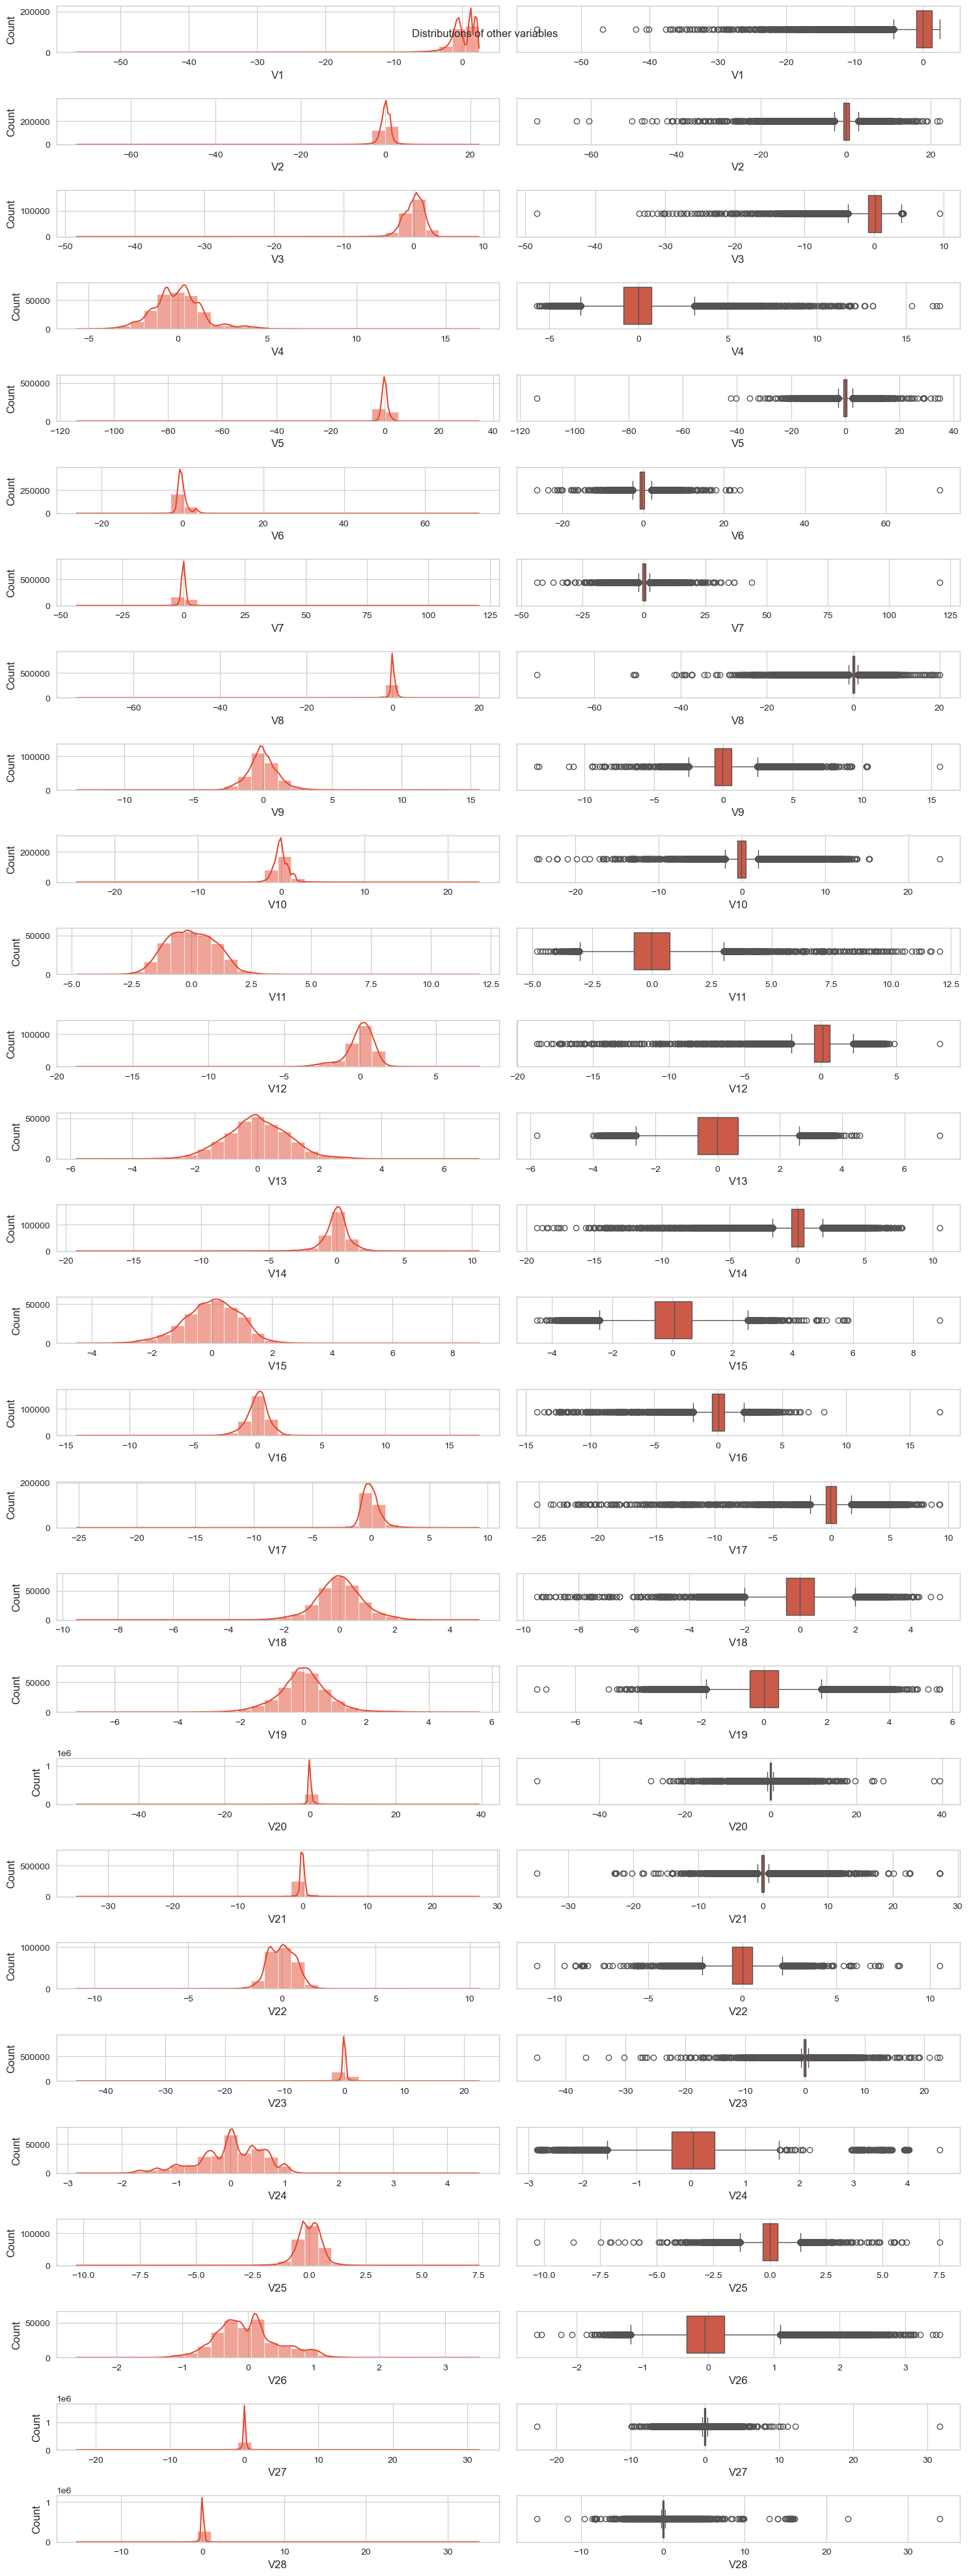

In [ ]:
nrows, ncols = len(data.columns[1:29]), 2
fig, ax = plt.subplots(nrows, ncols, figsize = (15, 40))

for idx, col in enumerate(data.columns[1:29]):

    plt.subplot(nrows, ncols, ncols*idx+1)
    sns.histplot(data = data, x = col, bins = 30, kde = True)

    plt.subplot(nrows, ncols, ncols*idx+2)
    sns.boxplot(data = data, x = col, orient = True)

plt.suptitle('Distributions of other variables')
fig.tight_layout()
plt.show()

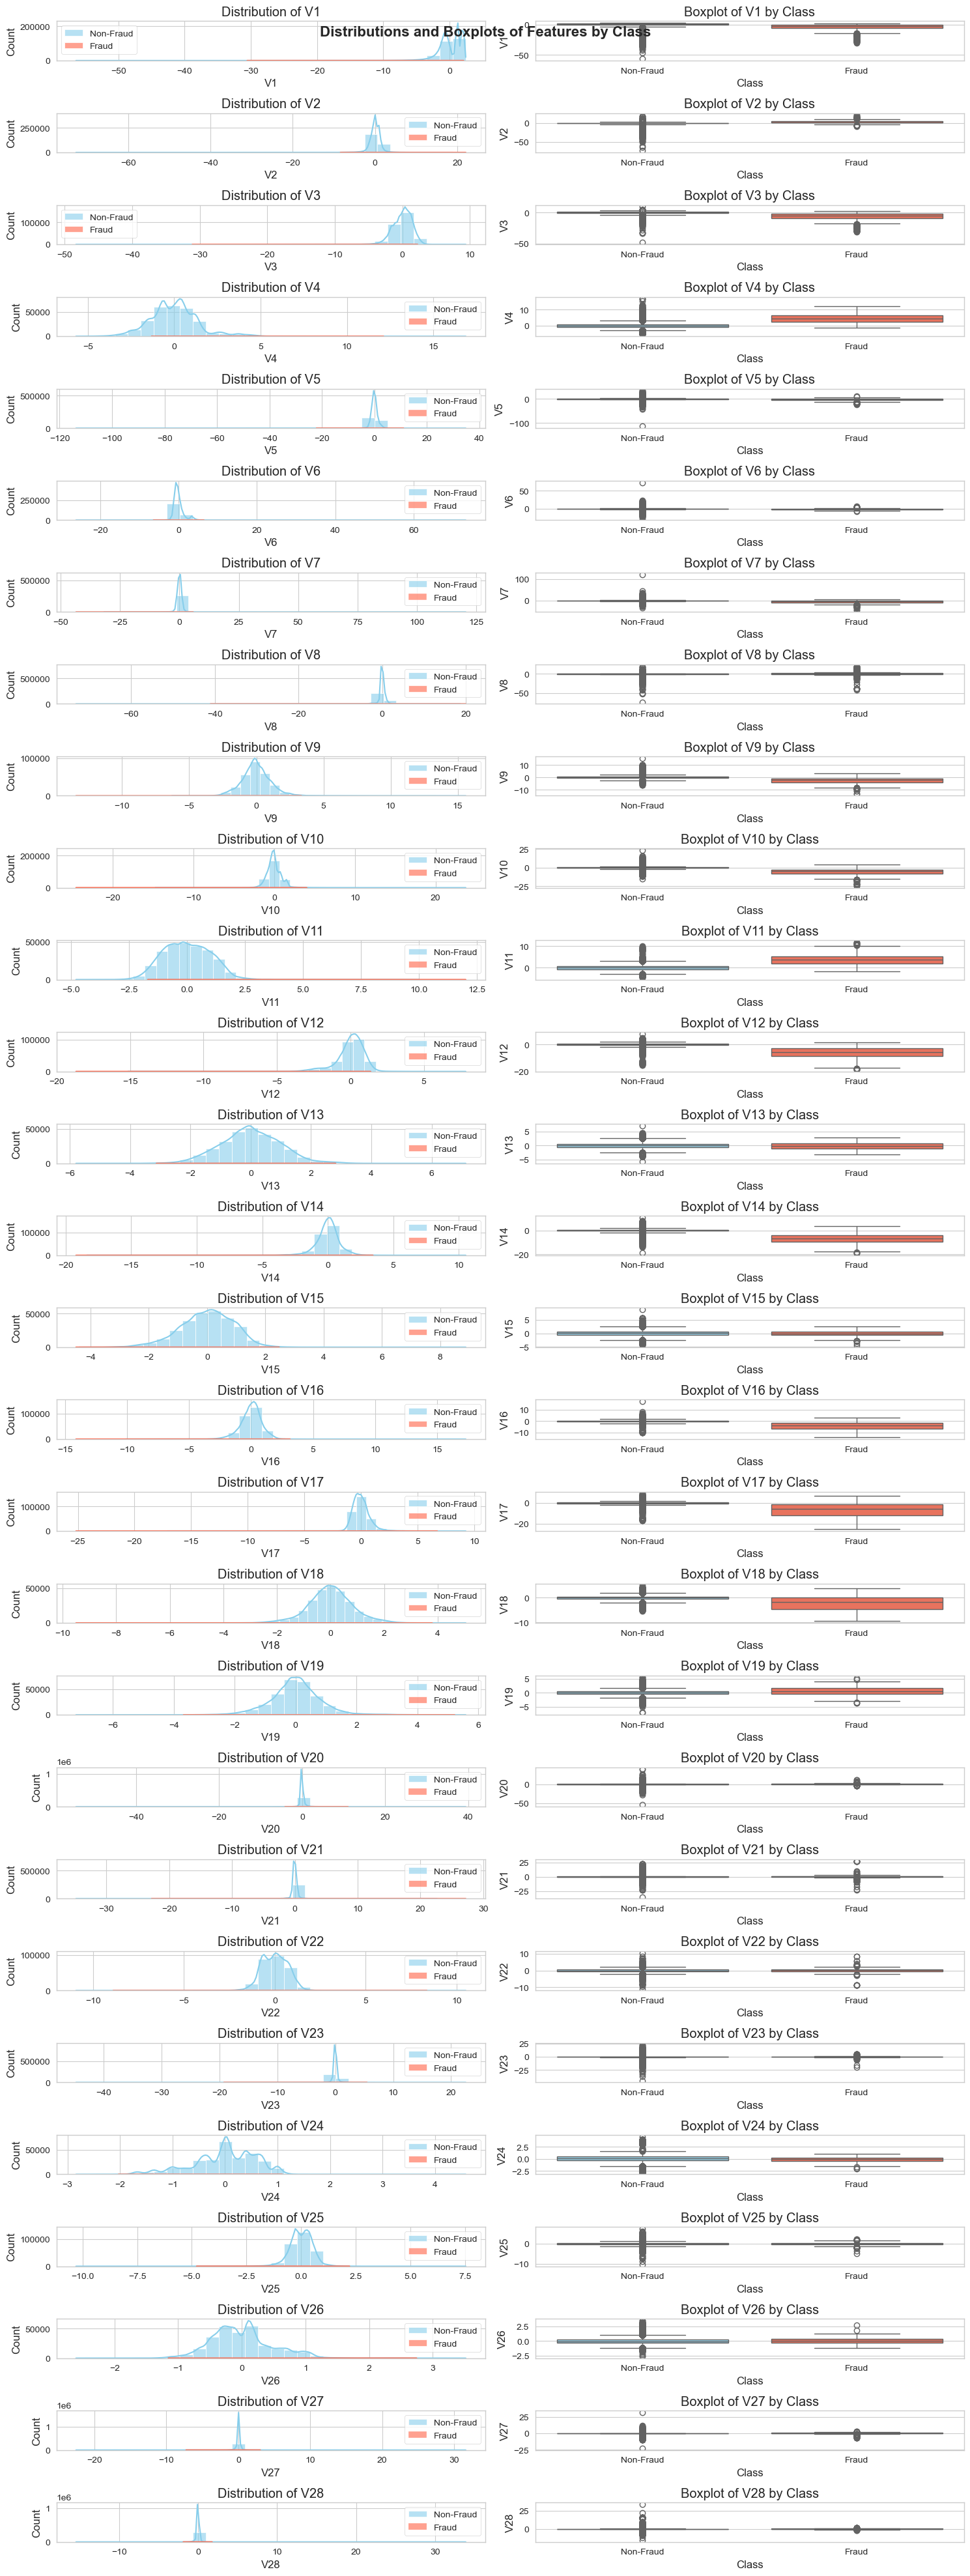

In [ ]:
# Target'Class' column: 0 = non-fraud, 1 = fraud
nrows, ncols = len(data.columns[1:29]), 2
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 40))

for idx, col in enumerate(data.columns[1:29]):
    # Histogram with separate lines for Fraud and Non-Fraud
    plt.subplot(nrows, ncols, ncols*idx + 1)
    sns.histplot(data[data['Class'] == 0][col], bins=30, kde=True, color='skyblue', label='Non-Fraud', alpha=0.6)
    sns.histplot(data[data['Class'] == 1][col], bins=30, kde=True, color='tomato', label='Fraud', alpha=0.6)
    plt.legend()
    plt.title(f'Distribution of {col}')

    # Boxplot (optional: can also split by class)
    plt.subplot(nrows, ncols, ncols*idx + 2)
    sns.boxplot(data=data, x='Class', y=col, palette=['skyblue', 'tomato'])
    plt.title(f'Boxplot of {col} by Class')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.suptitle('Distributions and Boxplots of Features by Class', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

**Comment:**

1. Most feature histograms appear sharp or irregular rather than bell-shaped. This indicates that applying a StandardScaler may not be appropriate, as the features are not normally distributed.

2. Many features show a high concentration of values near 0, suggesting strong dimensionality reduction effects—likely due to the PCA transformation, as mentioned in the data introduction.

3. Values associated with fraudulent transactions are sparse because the dataset is highly imbalanced. However, these values tend to appear at different ranges or in the tails of the feature distributions. Therefore, RobustScaler may not be suitable for this dataset, as it relies on the median and IQR, effectively ignoring the tails where anomalies occur. This could make the model less sensitive to rare events.

4. The boxplots confirm that fraud cases frequently appear outside the central quartile range, particularly in highly correlated features.

## **2.4. EDA Conclusion**

1.	The finding on ‘Amount’ feature indicates that most fraudulent transactions involve small amounts, but a few extremely large transactions. This pattern likely indicates a fraudulent strategy to test card validation by making small-amount transactions, followed by a few high-amount transaction in terms of maximazing profit before the card is blocked.

2.	The finding on ‘Time’ feature shows which fraudulent transactions often occur when human activity decreases, such as in the late night (02.00 AM). However, fraudulent transactions also occur during peak hours, as seen at 11.00 AM and in the afternoon. This suggests that analysis by hour of the day is unreliable feature for detecting fraud, as transactions happen during both peak and off-peak hours.

3.	The correlation analysis reveals that no features stand out as highly correlated (> 0.5 or ≤ 0.5) with fraud. This indicates that fraud is not a simple linear function but instead determined by complex, multivariate patterns. This finding suggests that simple linear models or static rule-based systems will likely be ineffective. Hence, the use of advanced, non-linear machine learning algorithms is essential.

# **3. Anomaly Detection**

Anomaly detection doesn't need a lot of fraudulent examples and can flag suspicious transactions based on their deviation from the norm.

**Why Use Anomaly Detection?**
- Handling Rare Events: Fraud is uncommon, and anomaly detection excels at identifying these rare occurrences.
- Adapting to New Fraud Tactics: Since anomaly detection looks for unusual patterns, it can catch new types of fraud even if they haven't been encountered before.
- Less Labeled Data Required: Unlike supervised learning, anomaly detection doesn't need extensive labeled data, reducing the time and effort for model training.

**Popular Anomaly Detection Algorithms**
- Isolation Forest: This algorithm isolates each point and finds the outliers (fraud). It's fast and works well on large datasets.
https://machinelearninggeek.com/outlier-detection-using-isolation-forests/

- One-Class SVM: This method looks at where normal transactions happen and flags anything unusual as potential fraud.
- Autoencoders: These are neural networks that try to recreate normal transactions. If they struggle to recreate something, it might be fraud.
- Local Outlier Factor (LOF): This algorithm checks the density of transactions around each point. If a transaction has fewer similar neighbors, it might be fraud.
- DBSCAN: This algorithm looks for groups of similar transactions (clusters). If a transaction doesn’t belong to any group, it might be an outlier or fraud.

## **3.1. Feature transformation**

Feature transformation plays an essential role in anomaly detection. Many anomaly detection techniques work best when the data follows a Gaussian (normal) distribution. If our features are skewed (i.e., they have long tails in one direction) or are on different scales, these algorithms may struggle to accurately identify normal data points and anomalies. This could lead to normal instances being wrongly flagged as outliers or genuine anomalies being overlooked.

According to our histogram plots, many of our features are highly skewed. To address this issue, we will apply log transformations; therefore, we will stabilize variance, reduce skewness, and enhance the interpretability of the data. This ensures that the characteristics of the data align more closely with the assumptions of the model, thereby improving its ability to accurately identify anomalies and enhancing the overall reliability of the detection process.

In [ ]:
#Features name
features = df.columns[:-1]

# Create a copy of the DataFrame to avoid changing the original
df_transformed = df.copy()

# Function to handle log transformation for skewed data
def log_transform_skewed(column):
    # For positive and zero values (log1p avoids log(0) errors)
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Compute skewness before transformation
skewness_before = df.skew()

# Apply transformation to skewed columns
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Compute skewness after transformation
skewness_after = df_transformed.skew()

# Compare skewness before and after
skewness_comparison = pd.DataFrame({
    'Skewness Before': skewness_before,
    'Skewness After': skewness_after
})

# Print the comparison
skewness_comparison


Skewness Before  Skewness After
Time          -0.035568       -0.035568
V1            -3.280667       -0.364893
V2            -4.624866       -0.310128
V3            -2.240155       -0.315192
V4             0.676292        0.676292
V5            -2.425901        0.139077
V6             1.826581        0.804345
V7             2.553907       -0.112666
V8            -8.521944       -0.912642
V9             0.554680        0.554680
V10            1.187141        0.420549
V11            0.356506        0.356506
V12           -2.278401       -0.616600
V13            0.065233        0.065233
V14           -1.995176       -0.279434
V15           -0.308423       -0.308423
V16           -1.100966       -0.262415
V17           -3.844914        0.278791
V18           -0.259880       -0.259880
V19            0.109192        0.109192
V20           -2.037155        0.605080
V21            3.592991        0.590471
V22           -0.213258       -0.213258
V23           -5.875140        0.099389
V24           -0.552499       -0.552499
V25           -0.415793       -0.415793
V26            0.576693        0.576693
V27           -1.170209       -0.754107
V28           11.192091       -0.601426
Amount        16.977724        0.162703
Class         23.997579       23.997579

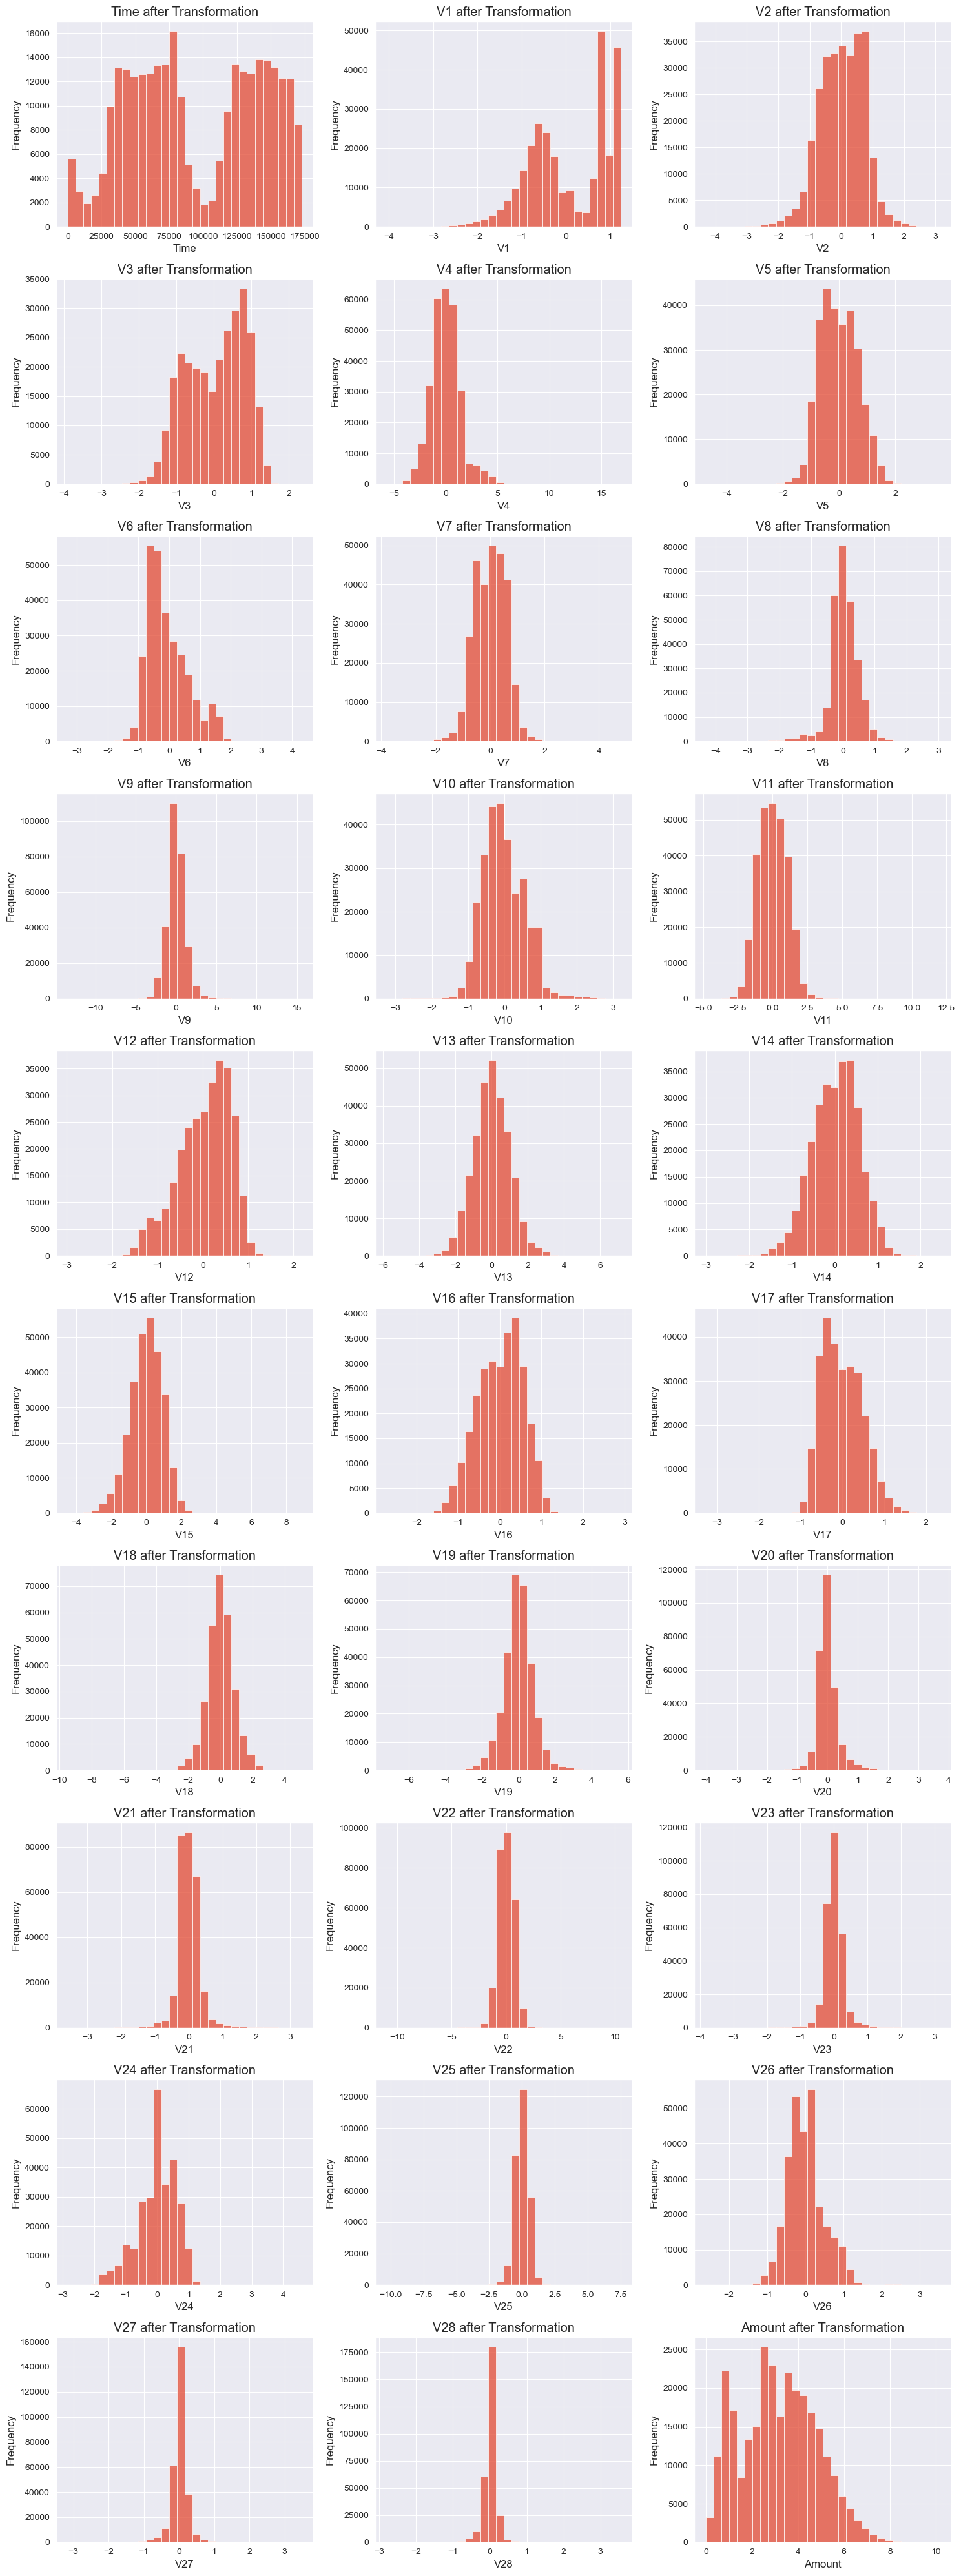

In [ ]:
# Set up the figure; 10 rows (10*3=30 subplots), adjust as needed
fig, axes = plt.subplots(10, 3, figsize=(15, 40))  # Adjust rows to fit all features

# Flatten axes array to loop through easily
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.histplot(df_transformed[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'{feature} after Transformation')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if features < 30
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Separate features and target
X = df_transformed[features]
y = df_transformed['Class']

from sklearn.preprocessing import MinMaxScaler
# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -0.858580 -0.070255  1.263094  1.378155 -0.291416  0.380071   
1            0.0  0.784749  0.235981  0.153991  0.448154  0.058286 -0.079145   
2            1.0 -0.857964 -0.850221  1.020005  0.379780 -0.407595  1.029798   
3            1.0 -0.676139 -0.169933  1.027114 -0.863291 -0.010256  0.809686   
4            2.0 -0.769290  0.630067  0.935590  0.403034 -0.341597  0.091596   
...          ...       ...       ...       ...       ...       ...       ...   
284802  172786.0 -2.555763  2.404400 -2.382762 -2.066656 -1.850731 -1.282831   
284803  172787.0 -0.549732 -0.053617  1.110221 -0.738589  0.624991  0.721936   
284804  172788.0  1.071435 -0.263328 -1.446834 -0.557828  1.289375  1.394079   
284805  172788.0 -0.215466  0.425583  0.532104  0.689799 -0.320605  0.484712   
284806  172792.0 -0.427496 -0.173729  0.532589 -0.506271 -0.012468 -0.500543   

              V7        V8        V9  .

## **3.2. Isolation Forest**
This technique works by randomly selecting features and splitting data points. Anomalies, or outliers, are easier to isolate, resulting in shorter paths in the "forest." It's effective for large datasets, as it can quickly identify anomalies without needing to model the data's distribution. However, it may miss complex patterns since it relies on simple random splits.

In [ ]:
# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=101)   # high contamination to catch more fraud transactions

# Fit the model and predict (returns -1 for anomalies and 1 for normal data)
iso_preds = iso_forest.fit_predict(X_scaled)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
iso_preds = [1 if x == -1 else 0 for x in iso_preds]

# Evaluate the results
print(classification_report(y, iso_preds, digits=4)) #CHỖ NÀY
roc_auc_iso = roc_auc_score(y, iso_preds)
print(f"ROC AUC Score:, {roc_auc_iso:.5f}") #CHỖ NÀY

              precision    recall  f1-score   support

           0     0.9997    0.9514    0.9750    284315
           1     0.0294    0.8516    0.0569       492

    accuracy                         0.9512    284807
   macro avg     0.5146    0.9015    0.5159    284807
weighted avg     0.9981    0.9512    0.9734    284807

ROC AUC Score:, 0.90151


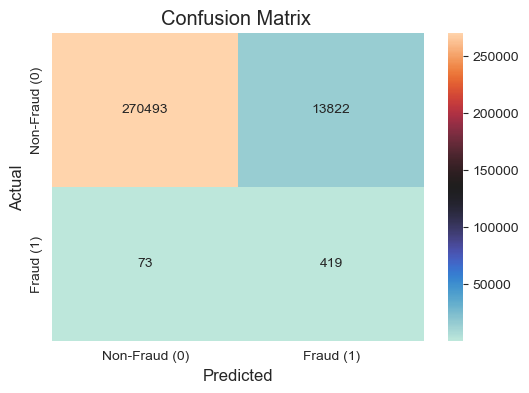

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y, iso_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap = "icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

The **Isolation Forest model** achieves **high overall accuracy** (95%) and a strong ROC AUC (0.90), indicating it’s generally good at distinguishing fraudulent from normal transactions.
However, its precision for the fraud class is very low (0.03), meaning it raises many false alarms.
On the other hand, recall is high (0.85), showing it successfully identifies most frauds.
This makes the model suitable for initial anomaly detection where catching all frauds is critical, but it would need post-filtering or secondary validation to reduce false positives.

In [ ]:
# Get anomaly scores (the lower, the more anomalous)
iso_scores = -iso_forest.decision_function(X_scaled)

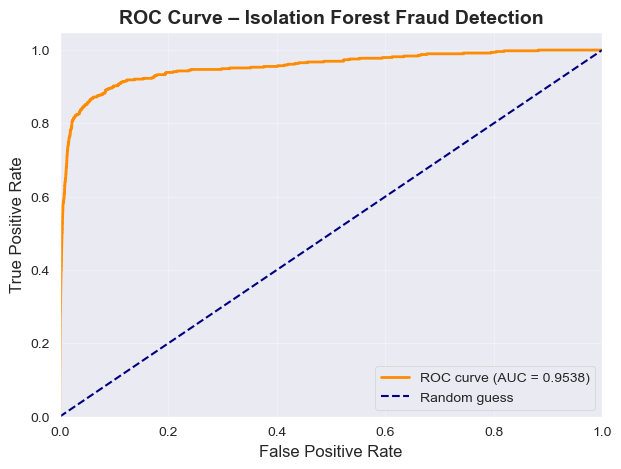

ROC AUC (using anomaly scores): 0.9538343406753274


In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, iso_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve – Isolation Forest Fraud Detection', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Also print ROC AUC using the raw scores
roc_auc_score_value = roc_auc_score(y, iso_scores)
print("ROC AUC (using anomaly scores):", roc_auc_score_value)

**Comment**
Here, the project also calculated ROC-AUC score, using a continuous anomaly score. This new ROC AUC evaluates the model's ability to rank fraud higher than normal across all posible thresholds. On the other hand, the previous ROC AUC score that indicated in the classification report is the Binary ROC AUC which sees only 0 for normal and 1 for fraud transaction.

## **3.3. One Class SVM**
This model learns the boundary of normal data points and flags any points outside this boundary as anomalies. It's particularly powerful in high-dimensional spaces where traditional methods may struggle. However, it can be computationally intensive and sensitive to the presence of noise in the data, which can lead to misclassification.




In [ ]:
# Initialize One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)

# Fit the model and predict (returns -1 for anomalies and 1 for normal data)
svm_preds = oc_svm.fit_predict(X_scaled)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
svm_preds = [1 if x == -1 else 0 for x in svm_preds]

# Evaluate the results
print(classification_report(y, svm_preds, digits=4))
roc_auc_svm = roc_auc_score(y, svm_preds)
print(f"ROC AUC Score:, {roc_auc_svm:.5f}") #CHỖ NÀY
print("Confusion Matrix:")


              precision    recall  f1-score   support

           0     0.9997    0.9514    0.9750    284315
           1     0.0293    0.8496    0.0567       492

    accuracy                         0.9512    284807
   macro avg     0.5145    0.9005    0.5158    284807
weighted avg     0.9981    0.9512    0.9734    284807

ROC AUC Score:, 0.90048
Confusion Matrix:


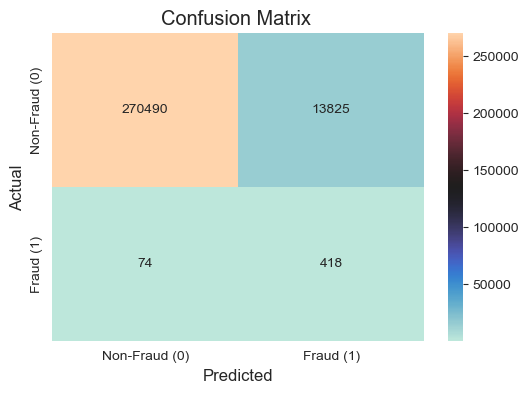

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y, svm_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap = "icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

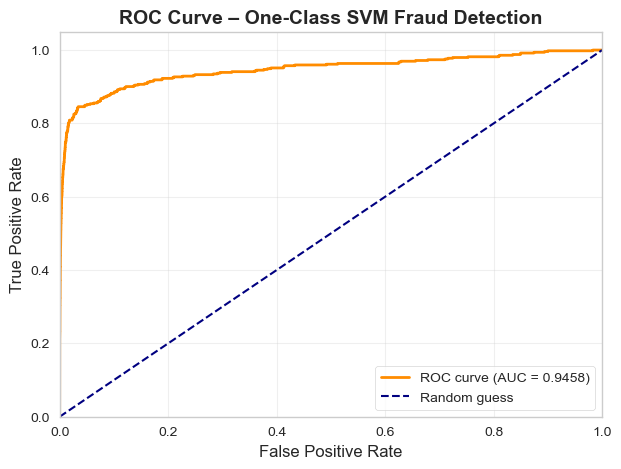

ROC AUC (using continuous scores): 0.9458170822497489


In [ ]:
# Get continuous anomaly scores from the SVM
# Higher scores → more normal; lower → more anomalous
svm_scores = -oc_svm.decision_function(X_scaled)  # negate to align higher = more likely fraud

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, svm_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve – One-Class SVM Fraud Detection', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Optional: print ROC AUC using continuous scores
roc_auc_score_value = roc_auc_score(y, svm_scores)
print("ROC AUC (using continuous scores):", roc_auc_score_value)

One-class SVM shows similar patterns recall with Isolation Forest (0.8496) but having a slightly worse performance; furthermore, its time-consuming nature may limit its practical application in real-time fraud detection systems

## **3.4. Local Outlier Factor (LOF)**
 LOF assesses the local density of each data point compared to its neighbors. If a point has a significantly lower density than those around it, it's considered an outlier. This technique is useful for identifying anomalies in varying densities but can be sensitive to the choice of the number of neighbors, which affects its performance.



In [ ]:
# Initialize Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)

# Predict (returns -1 for anomalies and 1 for normal data)
lof_preds = lof.fit_predict(X_scaled)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
lof_preds = [1 if x == -1 else 0 for x in lof_preds]

# Evaluate the results
print(classification_report(y, lof_preds, digits=4))
roc_auc_lof = roc_auc_score(y, lof_preds)
print(f"ROC AUC Score:, {roc_auc_lof:.5f}") #CHỖ NÀY
print("Confusion Matrix:")
print(confusion_matrix(y, lof_preds))

              precision    recall  f1-score   support

           0     0.9983    0.9500    0.9736    284315
           1     0.0025    0.0711    0.0048       492

    accuracy                         0.9485    284807
   macro avg     0.5004    0.5106    0.4892    284807
weighted avg     0.9966    0.9485    0.9719    284807

ROC AUC Score:, 0.51059
Confusion Matrix:
[[270109  14206]
 [   457     35]]


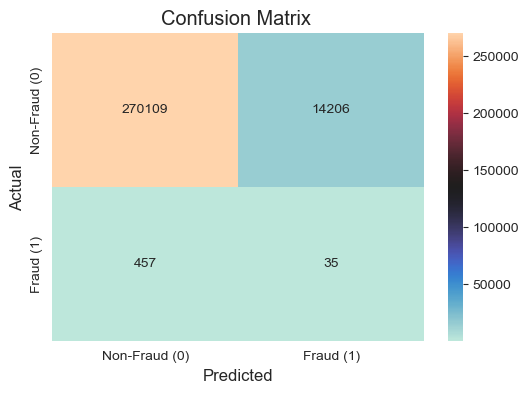

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y, lof_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap = "icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

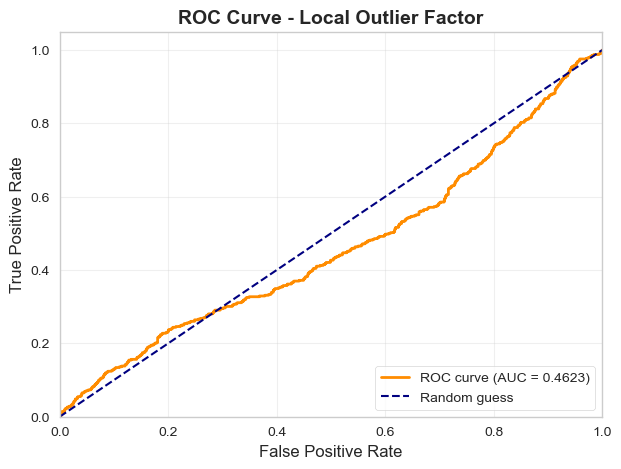

ROC AUC (using continuous scores): 0.46234609814575006


In [ ]:
# Get anomaly scores (higher = more anomalous)
lof_scores = -lof.negative_outlier_factor_

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, lof_scores)
roc_auc = roc_auc_score(y, lof_scores)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Local Outlier Factor', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Optional: print ROC AUC using continuous scores
roc_auc_score_value = roc_auc_score(y, lof_scores)
print("ROC AUC (using continuous scores):", roc_auc_score_value)

The result for LOF even worse than random guess, once again intepreted that this is the worse model

## **3.5. Autoencoders**

These are neural networks designed to compress and reconstruct data. By training on normal transactions, they learn to recreate them effectively. If a transaction cannot be reconstructed well, it's flagged as an anomaly. Autoencoders are great for capturing complex patterns in data, but they require more computational resources and careful tuning of architecture and parameters to perform effectively.

In [ ]:
# Define the autoencoder model
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

      # Encoder
    encoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(encoded)
    encoded = Dense(8, activation='relu', kernel_regularizer=l2(0.001))(encoded)

  # Latent space
    latent = Dense(4, activation='relu')(encoded)

# Decoder
    decoded = Dense(8, activation='relu', kernel_regularizer=l2(0.001))(latent)
    decoded = Dropout(0.2)(decoded)
    decoded = Dense(16, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    decoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    return autoencoder

In [ ]:
# Build and compile the model
autoencoder = build_autoencoder(X_scaled.shape[1])
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Train the model on normal transactions (non-fraudulent class, y == 0)
X_train = X_scaled[y == 0]
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

#Train on only the normal transaction data (y==0) to learn "normal behaviors, normal features" of the non-fraud transaction

# Calculate reconstruction error for all transactions
reconstructed = autoencoder.predict(X_scaled)
ae_mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(ae_mse, 90)  # Adjust threshold (90th percentile)
autoen_preds = np.where(ae_mse > threshold, 1, 0)  # 1: anomaly (fraud), 0: normal

# Evaluate the model
print(classification_report(y, autoen_preds, digits=4))
roc_auc_ae = roc_auc_score(y, autoen_preds)
print(f"ROC AUC Score:, {roc_auc_ae:.5f}") #CHỖ NÀY

Epoch 1/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 0.0405 - val_loss: 0.0134
Epoch 2/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.0088 - val_loss: 0.0132
Epoch 3/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.0087 - val_loss: 0.0131
Epoch 4/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.0087 - val_loss: 0.0131
Epoch 5/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.0087 - val_loss: 0.0133
Epoch 6/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.0087 - val_loss: 0.0134
Epoch 7/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.0087 - val_loss: 0.0132
Epoch 8/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.0087 - val_loss: 0.0135
Epoch 9/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.0087 - val_loss: 0.0133
Epoch 10/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.0087 - val_loss: 0.0132
Epoch 11/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.0087 - val_loss: 0.0131
Epoch 12/50
7997/79

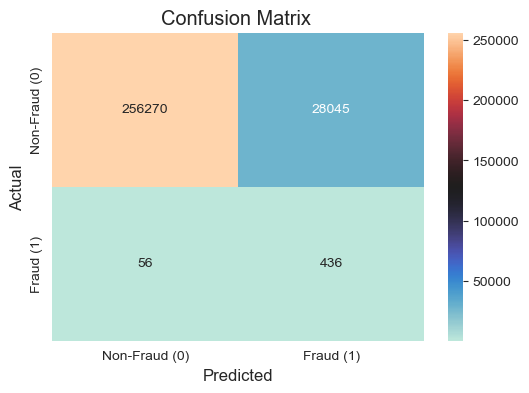

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

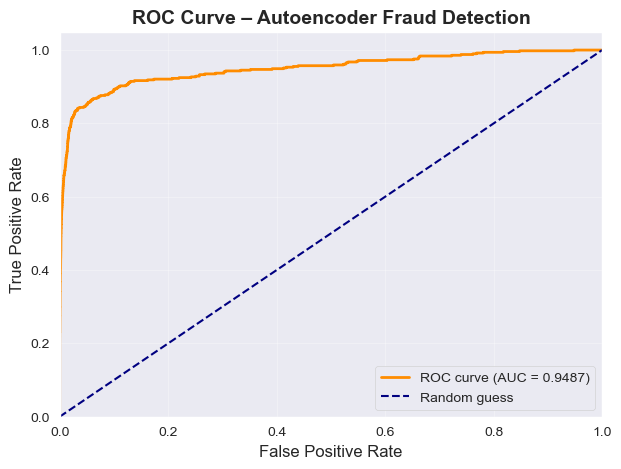

In [ ]:
# Use reconstruction errors (MSE) as continuous anomaly scores
fpr, tpr, thresholds = roc_curve(y, ae_mse)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve – Autoencoder Fraud Detection', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Autoencoders showed a strong balance between recall (0.8943) and accuracy (0.90). Despite its low precision (0.0154), its ability to capture most frauds makes it suitable and worthwhile for trade off, since it is often better to flag more potential cases for review than to miss real frauds.

# **4. Anomaly Detection with High-correlated features**

The project further analysed the application of these 2 effective unsupervised learning algorithms by testing only on features with absolute correlations with ‘Class’ ≥ 0.1. The result shows that removing weak variables can reduce noise and allow the models to focus on the most relevant patterns and improve the accuracy of Isolation Forest and Autoencoder

## **4.1. Data preparation (High-correlated set)**

In [ ]:
# Features that want to keep
cols_to_keep = ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Z with high-correlated features
Z = X[cols_to_keep]

# Print Z
print(Z.head())

         V1        V3        V4        V7       V10       V11       V12  \
0 -0.858580  1.263094  1.378155  0.214788  0.086906 -0.551600 -0.481068   
1  0.784749  0.153991  0.448154 -0.075852 -0.154414  1.612727  0.725244   
2 -0.857964  1.020005  0.379780  0.583031  0.188670  0.624501  0.063992   
3 -0.676139  1.027114 -0.863291  0.213181 -0.053495 -0.226487  0.164012   
4 -0.769290  0.935590  0.403034  0.465582  0.561371 -0.822843  0.430610   

        V14       V16       V17       V18  
0 -0.270919 -0.385535  0.188942  0.025791  
1 -0.134332  0.381116 -0.108679 -0.183361  
2 -0.153533 -1.358431  0.746673 -0.121359  
3 -0.253031 -0.722535 -0.521227  1.965775  
4 -0.751260 -0.372562 -0.212716 -0.038195  


In [ ]:
# Standardize the data
Z_scaled = scaler.fit_transform(Z)

## **4.2. Isolation Forest with High-correlated variables**

In [ ]:
# Initialize the Isolation Forest
iso_forest_imp = IsolationForest(contamination=0.05, random_state=101)   # high contamination to catch more fraud transactions

# Fit the model and predict (returns -1 for anomalies and 1 for normal data)
iso_imp_preds = iso_forest_imp.fit_predict(Z_scaled)

# Convert -1 (anomalies) to 1 (fraud) and 1 (normal) to 0 (non-fraud)
iso_imp_preds = [1 if x == -1 else 0 for x in iso_imp_preds]

# Evaluate the results
print(classification_report(y, iso_imp_preds, digits=4))
roc_imp_auc = roc_auc_score(y, iso_imp_preds)
print(f"ROC AUC Score: {roc_imp_auc:.5f}") #CHỖ NÀY


              precision    recall  f1-score   support

           0     0.9998    0.9515    0.9750    284315
           1     0.0310    0.8963    0.0599       492

    accuracy                         0.9514    284807
   macro avg     0.5154    0.9239    0.5175    284807
weighted avg     0.9981    0.9514    0.9735    284807

ROC AUC Score:, 0.92390


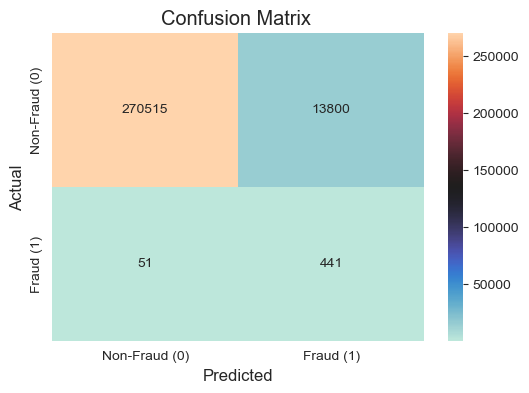

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y, iso_imp_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap = "icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [ ]:
# Get anomaly scores (the lower, the more anomalous)
iso_imp_scores = -iso_forest_imp.decision_function(Z_scaled)

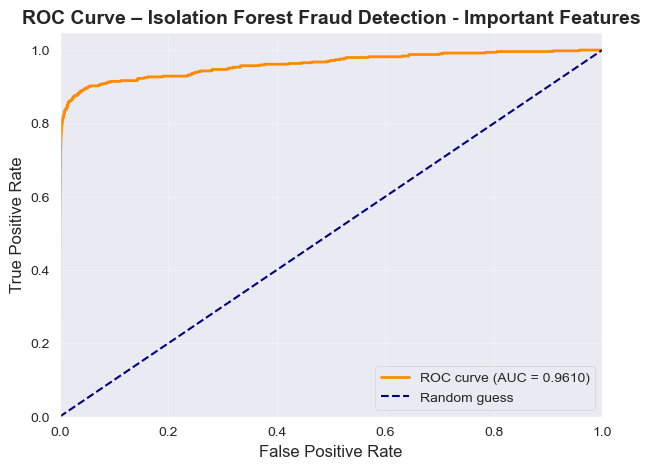

ROC AUC (using anomaly scores): 0.9609644075354986


In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, iso_imp_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve – Isolation Forest Fraud Detection - Important Features', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Also print ROC AUC using the raw scores
roc_auc_score_value = roc_auc_score(y, iso_imp_scores)
print("ROC AUC (using anomaly scores):", roc_auc_score_value)

This method achieved higher recall for fraudulent transactions, increasing from 0.8516 to 0.8963. The F1-scores for the fraud class also improved slightly for Isolation Forest, reflecting a better balance between identifying frauds and limiting the number of false positives

## **4.3. Autoencoder with High-correlatd variables**

In [ ]:
# Build and compile the model
autoencoder_imp = build_autoencoder(Z_scaled.shape[1])
autoencoder_imp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Train the model on normal transactions (non-fraudulent class, y == 0)
Z_train = Z_scaled[y == 0]
autoencoder_imp.fit(Z_train, Z_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

#Train on only the normal transaction data (y==0) to learn "normal behaviors, normal features" of the non-fraud transaction

# Calculate reconstruction error for all transactions
reconstructed_imp = autoencoder_imp.predict(Z_scaled)
ae_mse_imp = np.mean(np.power(Z_scaled - reconstructed_imp, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(ae_mse_imp, 90)  # Adjust threshold (90th percentile)
autoen_imp_preds = np.where(ae_mse_imp > threshold, 1, 0)  # 1: anomaly (fraud), 0: normal

# Evaluate the model
print(classification_report(y, autoen_imp_preds, digits=4))  #CHỖ NÀY
roc_auc_ae_imp = roc_auc_score(y, autoen_imp_preds)
print(f"ROC AUC Score: {roc_auc_ae_imp:.5f}") #CHỖ NÀY

Epoch 1/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.0411 - val_loss: 0.0111
Epoch 2/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 3/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 4/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 5/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 6/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 7/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 8/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.0095 - val_loss: 0.0096
Epoch 9/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 10/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 11/50
7997/7997 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 12/50
7997/79

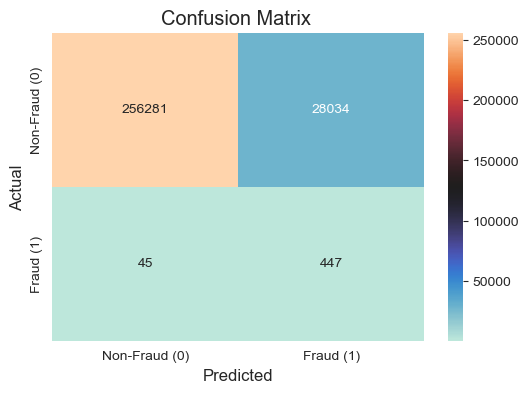

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y, autoen_imp_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

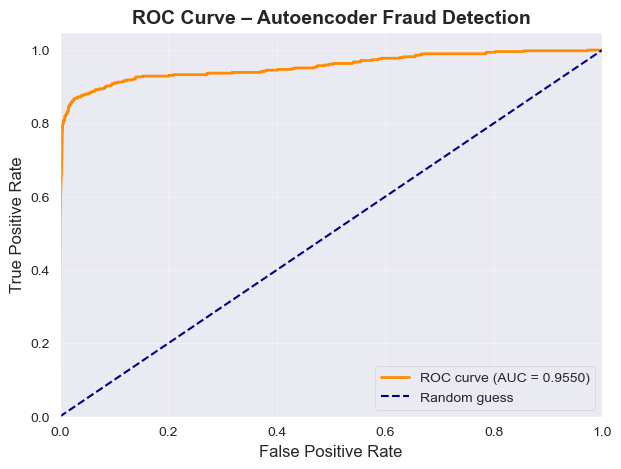

In [ ]:
# Use reconstruction errors (MSE) as continuous anomaly scores
fpr, tpr, thresholds = roc_curve(y, ae_mse_imp)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve – Autoencoder Fraud Detection', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

This method achieved higher recall for fraudulent transactions, increasing from 0.8516 to 0.8963 for the Autoencoder. Both predictives were able to detect a larger proportion of actual fraud cases after weak features were excluded. These results suggest that using unsupervised learning on higher correlation features further enhances the models’ sensitivity to meaningful anomalies, leading to stronger and more efficient unsupervised fraud detection performance.

# **5. Machine Learning**

**Machine Learning**
Fraud detection is a binary classification task in which any transaction will be predicted and labeled as a fraud or legit. Different machine learning algorithms are tested and analysed.
- RandomForestClassifier()
- XGBClassifier()
- LGBMClassifier()
- CatBoostClassifier()
- AdaBoostClassifier()

## **5.1. Data preposessing with SMOTE**

To evaluate the performance of different machine learning algorithms, the dataset is processed with SMOTE, and then separated into 2 small datasets, “train” and “test”, and then it is tested again with the full original dataframe, which has not gone through any kind of processing. This will ensure the most accurate assessment and help us to recognise the possibility of real-life application.

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Define dataset
def Definedata(df):
    X_smote = df.drop(columns=['Class']).values
    y_smote = df['Class'].values
    return X_smote, y_smote

In [ ]:
def ApplySMOTE(df, test_size=0.5, random_state=2):
    X_smote, y_smote = Definedata(df)

    # summarize class distribution
    counter = Counter(y_smote)
    print("Original class distribution:", counter)

    # apply SMOTE
    smt = SMOTE(random_state=0)
    X_res, y_res = smt.fit_resample(X_smote, y_smote)

    # summarize new class distribution
    counter_res = Counter(y_res)
    print("After SMOTE class distribution:", counter_res)

    # split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=test_size, random_state=random_state
    )

    # optional: scatter plot for first 2 features
    for label in np.unique(y_res):
        row_ix = np.where(y_res == label)
        plt.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
    plt.legend()
    plt.title("SMOTE Data Distribution (first 2 features)")
    plt.show()

    return X_train, X_test, y_train, y_test

In [ ]:
# Train model and plot confusion matrices
def Models(model, X_train, X_test, y_train, y_test, df, title="Model", cmap='icefire'):
    # train model
    model.fit(X_train, y_train)

    # full dataset
    X_all, y_all = Definedata(df)

    # confusion matrices
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    full_matrix = pd.crosstab(y_all, model.predict(X_all), rownames=['Actual'], colnames=['Predicted'])

    # plot heatmaps
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 4))

    sns.heatmap(train_matrix, annot=True, fmt="d", cbar=False, ax=ax1, cmap=cmap)
    ax1.set_title(f"{title} - Training Set")
    ax1.set_xlabel(f"Accuracy: {accuracy_score(y_train, model.predict(X_train)):.4f}")

    sns.heatmap(test_matrix, annot=True, fmt="d", cbar=False, ax=ax2, cmap=cmap)
    ax2.set_title(f"{title} - Testing Set")
    ax2.set_xlabel(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")

    sns.heatmap(full_matrix, annot=True, fmt="d", cbar=False, ax=ax3, cmap=cmap)
    ax3.set_title(f"{title} - Full Dataset")
    ax3.set_xlabel(f"Accuracy: {accuracy_score(y_all, model.predict(X_all)):.4f}")

    plt.show()

    return model, model.predict(X_all)

In [ ]:
# Feature importances
def FeatureImportances(model, X_train, y_train, df):
    # Fit model
    model.fit(X_train, y_train)

    # Feature importance
    importances = model.feature_importances_
    features = df.drop(columns=['Class']).columns

    # Create dataframe
    imp = pd.DataFrame({'Feature': features, 'Importance': importances})

    # Cumulative Importance
    imp['Cumulative Importance'] = imp['Importance'].cumsum()

    # Sort importance
    imp = imp.sort_values(by='Importance', ascending = False).reset_index(drop=True)

    return imp

Original class distribution: Counter({np.int64(0): 284315, np.int64(1): 492})
After SMOTE class distribution: Counter({np.int64(0): 284315, np.int64(1): 284315})


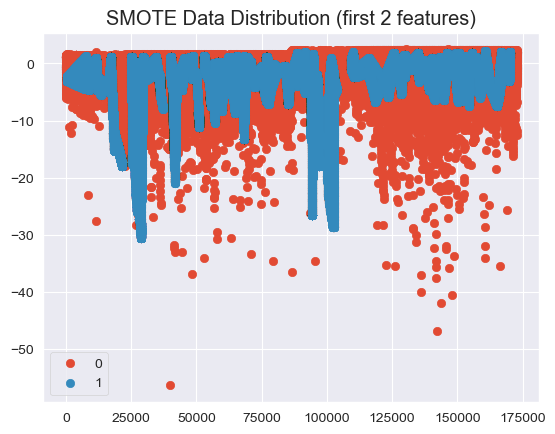

In [ ]:
# Apply SMOTE
X_train, X_test, y_train, y_test = ApplySMOTE(df)

## **5.2. Random Forest**

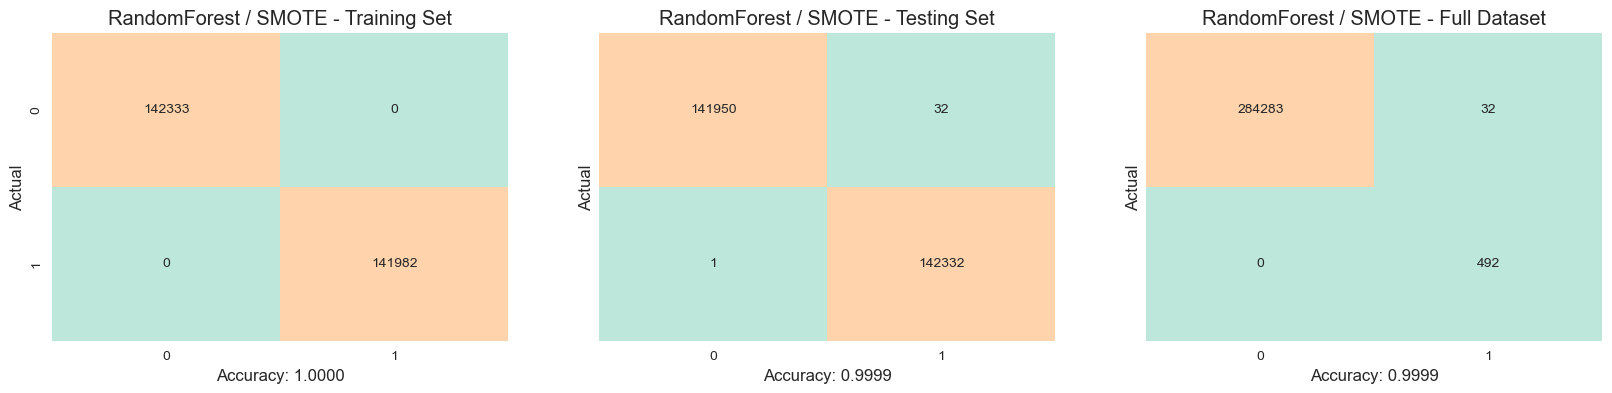

In [ ]:
# Train RandomForest model
rf_model = RandomForestClassifier(random_state=0)
model, y_pred = Models(rf_model, X_train, X_test, y_train, y_test, df, title="RandomForest / SMOTE")

In [ ]:
# Feature importances
imp_df = FeatureImportances(rf_model, X_train, y_train, df)
print(imp_df)

   Feature  Importance  Cumulative Importance
0      V14    0.250285               0.855040
1      V10    0.177638               0.433753
2       V4    0.102990               0.192582
3      V12    0.097679               0.599800
4      V11    0.068367               0.502120
5      V16    0.051221               0.910159
6       V3    0.042957               0.089592
7      V17    0.030540               0.940699
8       V2    0.028953               0.046635
9       V7    0.017694               0.231475
10      V9    0.017217               0.256115
11      V6    0.014956               0.213782
12     V21    0.010976               0.969616
13      V1    0.010119               0.017683
14     V18    0.009344               0.950043
15    Time    0.007564               0.007564
16      V8    0.007423               0.238899
17      V5    0.006244               0.198825
18     V27    0.005277               0.991734
19     V13    0.004955               0.604754
20     V19    0.004435            

In [ ]:
# Full dataset
X_all, y_all = Definedata(df)

In [ ]:
# Classification report
report = classification_report(y_all, y_pred, digits=4)
print("Classification Report (Full Dataset)")
print(report)

# Get probabilities for the positive class (Class=1)
y_proba_rf = rf_model.predict_proba(X_all)[:, 1]

# ROC-AUC
roc_auc_rf = roc_auc_score(y_all, y_proba_rf)
print(f"ROC AUC Score (Full Dataset): {roc_auc_rf:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_all, y_pred)
cm_df = pd.DataFrame(cm, index=[f"Actual_{i}" for i in range(cm.shape[0])],
                     columns=[f"Pred_{i}" for i in range(cm.shape[1])])
print("Confusion Matrix (Full Dataset):")
print(cm_df)


Classification Report (Full Dataset)
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999    284315
           1     0.9389    1.0000    0.9685       492

    accuracy                         0.9999    284807
   macro avg     0.9695    0.9999    0.9842    284807
weighted avg     0.9999    0.9999    0.9999    284807

ROC AUC Score (Full Dataset): 0.99999
Confusion Matrix (Full Dataset):
          Pred_0  Pred_1
Actual_0  284283      32
Actual_1       0     492


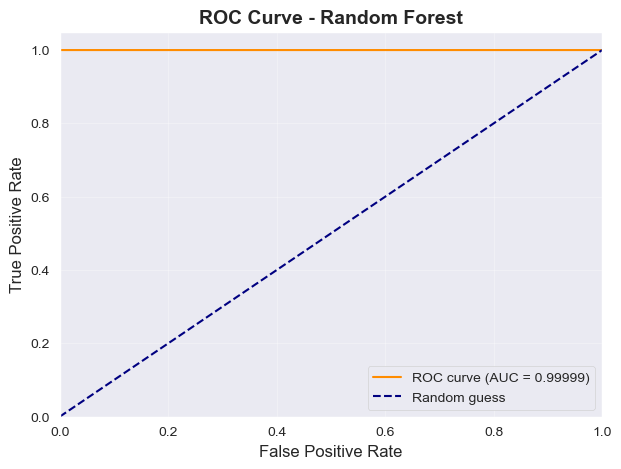

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, y_proba_rf)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc_rf:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Calculate Gini coefficient
gini = 2 * roc_auc_rf - 1
print(f"Gini Coefficient: {gini:.4f}")

Gini Coefficient: 0.8970


The Random Forest so far is the best performing model with the highest F1-score (0.9685), and according to its confusion matrix, there are no false negatives and 32 false positives

## **5.3. XGBoost**

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

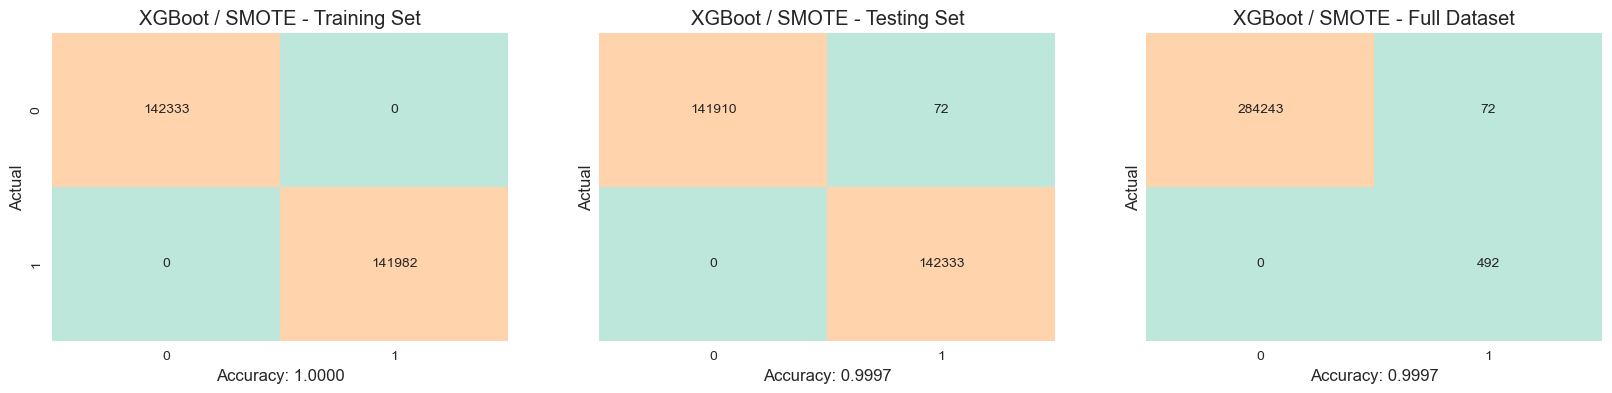

In [ ]:
# Train XGBoots model
xgb_model = XGBClassifier(random_state=0)
model, y_pred = Models(xgb_model, X_train, X_test, y_train, y_test, df, title="XGBoot / SMOTE")

In [ ]:
# Feature importances
imp_df = FeatureImportances(xgb_model, X_train, y_train, df)
print(imp_df)

   Feature  Importance  Cumulative Importance
0      V14    0.686158               0.877947
1       V4    0.049101               0.086606
2      V12    0.038648               0.182319
3      V17    0.033128               0.926201
4       V8    0.014026               0.116593
5       V3    0.013963               0.037505
6       V1    0.012154               0.019528
7      V11    0.010956               0.143671
8      V10    0.010065               0.132715
9      V19    0.009492               0.942271
10     V13    0.009470               0.191789
11  Amount    0.009441               1.000000
12     V15    0.008890               0.886837
13     V28    0.007497               0.990559
14     V23    0.007450               0.963867
15    Time    0.007375               0.007375
16     V18    0.006577               0.932778
17     V16    0.006236               0.893073
18      V6    0.006225               0.097054
19     V25    0.006173               0.973995
20     V26    0.006086            

In [ ]:
# Full dataset
X_all, y_all = Definedata(df)

# Classification report
report = classification_report(y_all, y_pred, digits=4)
print("Classification Report (Full Dataset)")
print(report)

# Get probabilities for the positive class (Class=1)
y_proba_xgb = xgb_model.predict_proba(X_all)[:, 1]

# ROC-AUC
roc_auc_xgb = roc_auc_score(y_all, y_proba_xgb)
print(f"ROC AUC Score (Full Dataset): {roc_auc_xgb:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_all, y_pred)
cm_df = pd.DataFrame(cm, index=[f"Actual_{i}" for i in range(cm.shape[0])],
                     columns=[f"Pred_{i}" for i in range(cm.shape[1])])
print("Confusion Matrix (Full Dataset):")
print(cm_df)


Classification Report (Full Dataset)
              precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999    284315
           1     0.8723    1.0000    0.9318       492

    accuracy                         0.9997    284807
   macro avg     0.9362    0.9999    0.9658    284807
weighted avg     0.9998    0.9997    0.9998    284807

ROC AUC Score (Full Dataset): 0.99998
Confusion Matrix (Full Dataset):
          Pred_0  Pred_1
Actual_0  284243      72
Actual_1       0     492


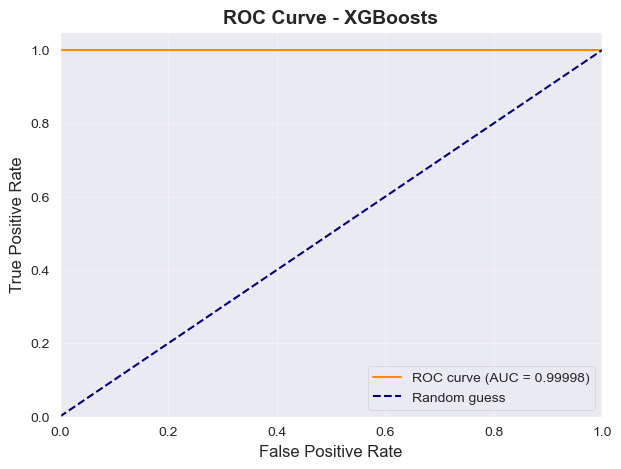

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, y_proba_xgb)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc_xgb:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - XGBoosts', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Calculate Gini coefficient
gini_xgb = 2 * roc_auc_xgb - 1
print(f"Gini Coefficient of XGBoosts: {gini_xgb:.4f}")

Gini Coefficient of XGBoosts: 1.0000


## **5.4. AdaBoost Classifier**

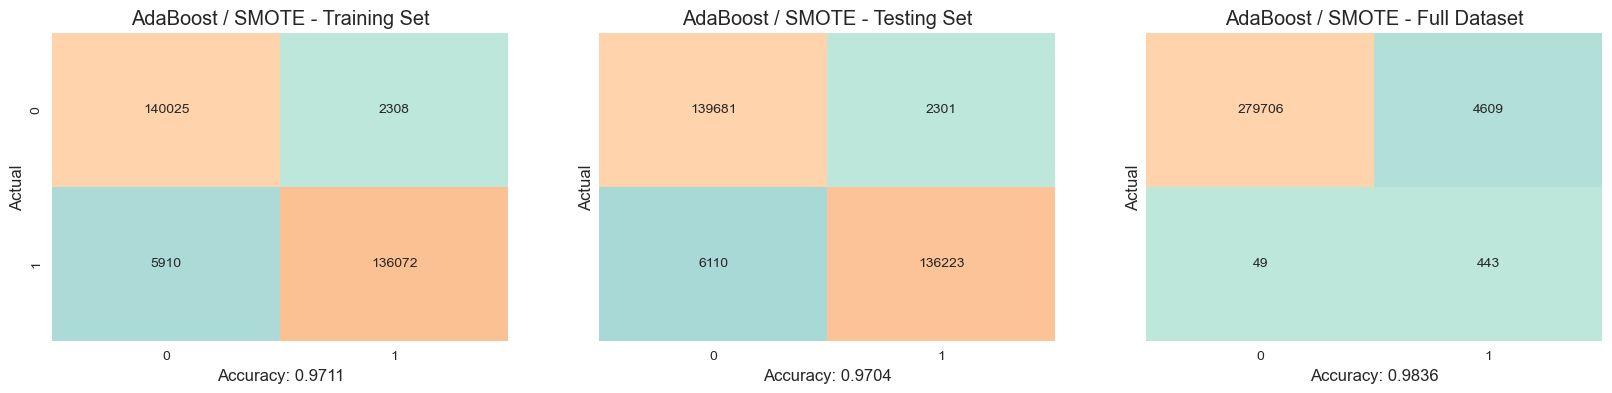

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
ada_model = AdaBoostClassifier(
    random_state=0,
    algorithm='SAMME',
    learning_rate=0.5,
    n_estimators=100
)

# Fit model and make predictions
model, y_pred = Models(ada_model, X_train, X_test, y_train, y_test, df, title="AdaBoost / SMOTE")

In [ ]:
# Feature importances
imp_df = FeatureImportances(ada_model, X_train, y_train, df)
print(imp_df)

   Feature  Importance  Cumulative Importance
0       V4    0.256805               0.409354
1      V14    0.179490               0.857148
2       V1    0.089257               0.102619
3      V10    0.084256               0.596361
4      V12    0.068312               0.677658
5       V3    0.049930               0.152550
6      V17    0.047868               0.950494
7      V16    0.045478               0.902626
8       V9    0.044831               0.512105
9       V8    0.028097               0.467274
10      V6    0.017116               0.426470
11     V21    0.015014               0.989553
12     V19    0.014434               0.974539
13    Time    0.013362               0.013362
14     V11    0.012985               0.609346
15      V7    0.012707               0.439176
16     V22    0.010447               1.000000
17     V18    0.009611               0.960105
18     V26    0.000000               1.000000
19     V24    0.000000               1.000000
20     V27    0.000000            

In [ ]:
# Full dataset
X_all, y_all = Definedata(df)

# Classification report
report = classification_report(y_all, y_pred, digits=4)
print("Classification Report (Full Dataset)")
print(report)

# Get probabilities for the positive class (Class=1)
y_proba_ada = ada_model.predict_proba(X_all)[:,1]

# ROC-AUC
roc_auc_ada = roc_auc_score(y_all, y_proba_ada)
print(f"ROC AUC Score (Full Dataset): {roc_auc_ada:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_all, y_pred)
cm_df = pd.DataFrame(cm, index=[f"Actual_{i}" for i in range(cm.shape[0])],
                     columns=[f"Pred_{i}" for i in range(cm.shape[1])])
print("Confusion Matrix (Full Dataset):")
print(cm_df)

Classification Report (Full Dataset)
              precision    recall  f1-score   support

           0     0.9998    0.9838    0.9917    284315
           1     0.0877    0.9004    0.1598       492

    accuracy                         0.9836    284807
   macro avg     0.5438    0.9421    0.5758    284807
weighted avg     0.9982    0.9836    0.9903    284807

ROC AUC Score (Full Dataset): 0.98654
Confusion Matrix (Full Dataset):
          Pred_0  Pred_1
Actual_0  279706    4609
Actual_1      49     443


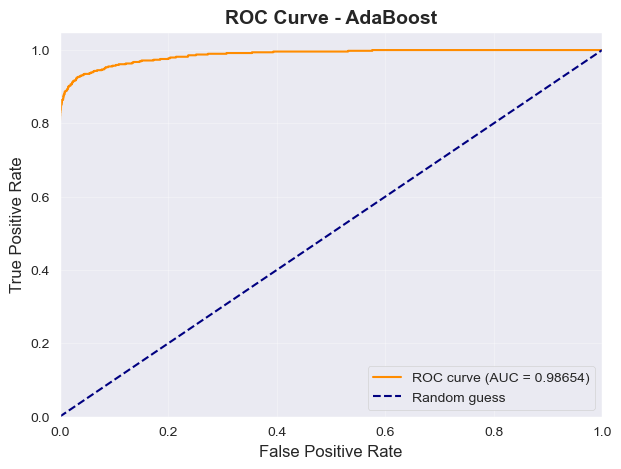

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, y_proba_ada)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc_ada:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - AdaBoost', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Calculate Gini coefficient
gini_ada = 2 * roc_auc_ada - 1
print(f"Gini Coefficient of AdaBoost: {gini_ada:.4f}")

Gini Coefficient of AdaBoost: 0.9731


## **5.5. CatBoost Classifier**

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

0:	total: 799ms	remaining: 6m 38s
100:	total: 1m 3s	remaining: 4m 10s
200:	total: 2m 2s	remaining: 3m 1s
300:	total: 2m 59s	remaining: 1m 58s
400:	total: 3m 56s	remaining: 58.4s
499:	total: 4m 52s	remaining: 0us


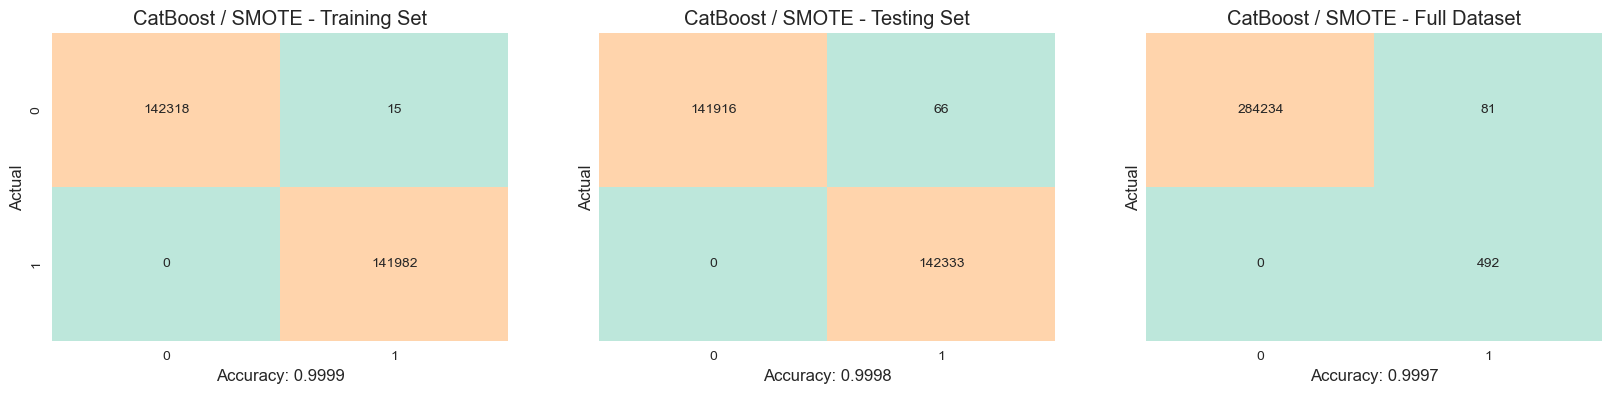

In [ ]:
# Train CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.02,
    depth=12,
    eval_metric='AUC',
    random_seed=42,
    bagging_temperature=0.2,
    od_type='Iter',
    metric_period=100,
    od_wait=100
)

# Fit model and make predictions (using your custom Models() function)
model, y_pred = Models(cat_model, X_train, X_test, y_train, y_test, df, title="CatBoost / SMOTE")



In [ ]:
# Feature importances
imp_df = FeatureImportances(cat_model, X_train, y_train, df)
print(imp_df)

0:	total: 615ms	remaining: 5m 6s
100:	total: 1m 4s	remaining: 4m 16s
200:	total: 2m 6s	remaining: 3m 8s
300:	total: 3m 7s	remaining: 2m 3s
400:	total: 4m 5s	remaining: 1m
499:	total: 5m 1s	remaining: 0us
   Feature  Importance  Cumulative Importance
0       V4   10.558071              28.492508
1      V14    9.628263              64.363785
2     Time    6.149528               6.149528
3       V1    5.218653              11.368180
4      V12    4.703308              52.458873
5       V8    4.389547              39.213755
6      V26    4.253768              94.566676
7      V17    4.040698              74.541483
8       V3    4.002107              17.934438
9      V11    3.904972              47.755565
10     V15    3.528889              67.892674
11     V24    3.168479              87.738581
12     V10    2.685276              43.850593
13     V16    2.608112              70.500786
14     V25    2.574327              90.312908
15      V2    2.564150              13.932330
16      V6    

In [ ]:
# Full dataset
X_all, y_all = Definedata(df)

# Classification report
report = classification_report(y_all, y_pred, digits=4)
print("=== Classification Report on Full Dataset ===")
print(report)

# Get probabilities for the positive class (Class=1)
y_proba_cat = cat_model.predict_proba(X_all)[:,1]

# ROC-AUC
roc_auc_cat = roc_auc_score(y_all, y_proba_cat)
print(f"ROC AUC Score (Full Dataset): {roc_auc_cat:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_all, y_pred)
cm_df = pd.DataFrame(cm, index=[f"Actual_{i}" for i in range(cm.shape[0])],
                     columns=[f"Pred_{i}" for i in range(cm.shape[1])])
print("Confusion Matrix (Full Dataset):")
print(cm_df)

=== Classification Report on Full Dataset ===
              precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999    284315
           1     0.8586    1.0000    0.9239       492

    accuracy                         0.9997    284807
   macro avg     0.9293    0.9999    0.9619    284807
weighted avg     0.9998    0.9997    0.9997    284807

ROC AUC Score (Full Dataset): 0.99998
Confusion Matrix (Full Dataset):
          Pred_0  Pred_1
Actual_0  284234      81
Actual_1       0     492


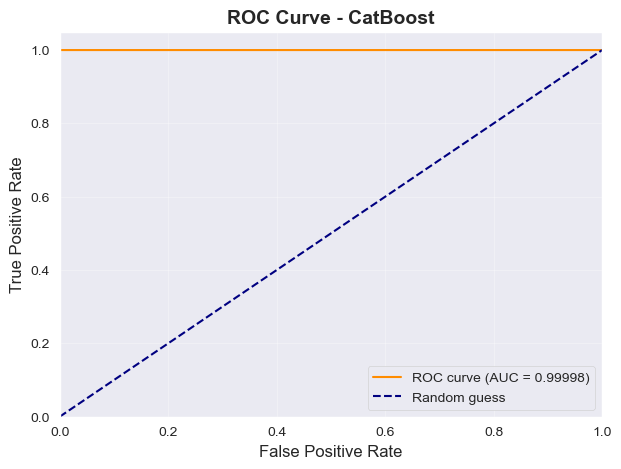

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, y_proba_cat)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc_cat:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - CatBoost', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Calculate Gini coefficient
gini_cat = 2 * roc_auc_cat - 1
print(f"Gini Coefficient of CatBoost: {gini_cat:.4f}")

Gini Coefficient of CatBoost: 1.0000


## **5.6. Light GBM**

In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

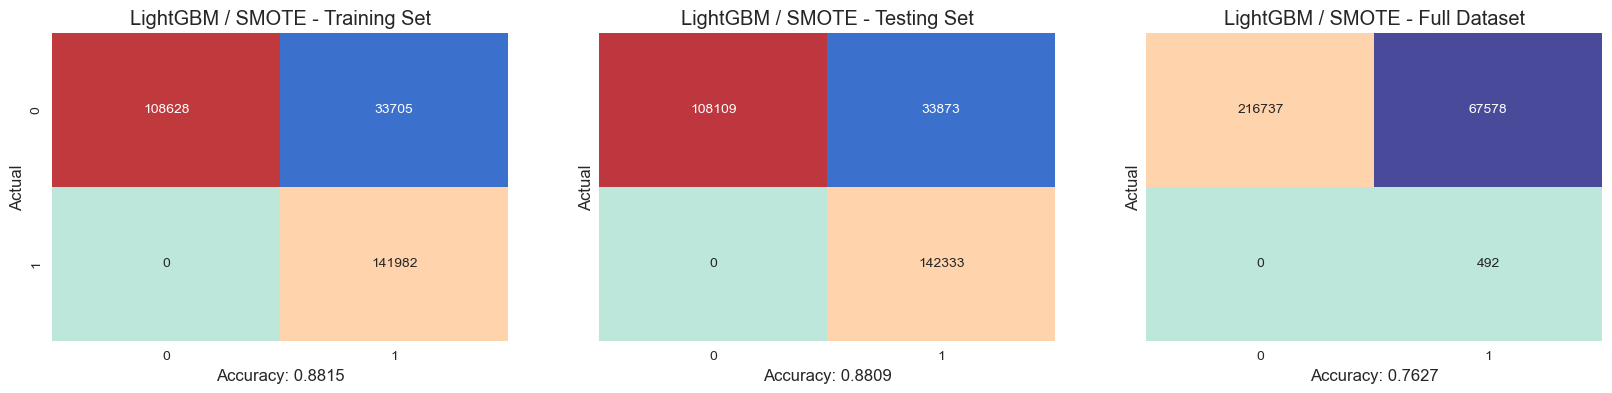

In [ ]:
# LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 7,              # should be smaller than 2^(max_depth)
    'max_depth': 4,               # -1 means no limit
    'min_child_samples': 100,     # minimum data in one leaf
    'max_bin': 100,               # number of bins for feature values
    'subsample': 0.9,             # subsample ratio for training data
    'subsample_freq': 1,          # frequency of subsampling
    'colsample_bytree': 0.7,      # ratio of columns for each tree
    'min_child_weight': 0,        # minimum sum of instance weight in a leaf
    'min_split_gain': 0,          # minimum loss reduction required to make a split
    'nthread': 8,
    'verbose': 0,
    'scale_pos_weight': 150       # for highly imbalanced data
}

# Train LightGBM model
lgbm_model = LGBMClassifier(random_state=0, **params)

# Fit model and make predictions (using your custom Models() function)
model, y_pred = Models(lgbm_model, X_train, X_test, y_train, y_test, df, title="LightGBM / SMOTE")


In [ ]:
# Feature importances
imp_df = FeatureImportances(lgbm_model, X_train, y_train, df)
print(imp_df)

   Feature  Importance  Cumulative Importance
0       V4          95                    245
1      V14          82                    494
2       V1          52                     91
3       V8          48                    308
4      V12          47                    404
5       V3          43                    150
6     Time          39                     39
7      V10          30                    341
8      V11          16                    357
9       V2          16                    107
10     V18          15                    527
11     V19          11                    538
12     V25          10                    583
13     V16          10                    506
14      V5           9                    254
15     V13           8                    412
16     V20           8                    546
17     V22           8                    561
18     V24           7                    573
19     V26           7                    590
20     V21           7            

In [ ]:
# Full dataset
X_all, y_all = Definedata(df)

# classification report
report = classification_report(y_all, y_pred, digits=4)
print("Classification Report (Full Dataset)")
print(report)

# Get probabilities for the positive class (Class=1)
y_proba_lgbm = lgbm_model.predict_proba(X_all)[:,1]

# ROC-AUC
roc_auc_lgbm = roc_auc_score(y_all, y_proba_lgbm)
print(f"ROC AUC Score (Full Dataset): {roc_auc:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_all, y_pred)
cm_df = pd.DataFrame(cm, index=[f"Actual_{i}" for i in range(cm.shape[0])],
                     columns=[f"Pred_{i}" for i in range(cm.shape[1])])
print("Confusion Matrix (Full Dataset):")
print(cm_df)

Classification Report (Full Dataset)
              precision    recall  f1-score   support

           0     1.0000    0.7623    0.8651    284315
           1     0.0072    1.0000    0.0144       492

    accuracy                         0.7627    284807
   macro avg     0.5036    0.8812    0.4397    284807
weighted avg     0.9983    0.7627    0.8637    284807

ROC AUC Score (Full Dataset): 0.95497
Confusion Matrix (Full Dataset):
          Pred_0  Pred_1
Actual_0  216737   67578
Actual_1       0     492


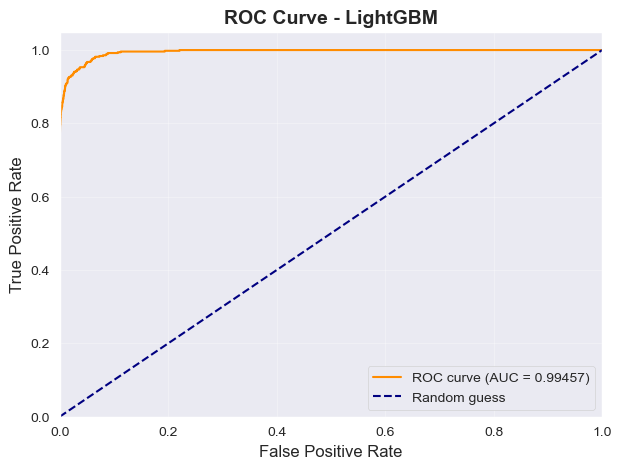

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, y_proba_lgbm)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc_lgbm:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - LightGBM', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Calculate Gini coefficient
gini_lgbm = 2 * roc_auc_lgbm - 1
print(f"Gini Coefficient of CatBoost: {gini_lgbm:.4f}")

Gini Coefficient of CatBoost: 0.9891


Overall, the results of supervised learning algorithms are much more precise than unsupervised ones. The Random Forest so far is the best performing model with the highest F1-score (0.9685), and according to its confusion matrix, there are no false negatives and 32 false positives. XGBoots and CatBoots both have good recalls and no false negatives, but XGBoots slightly performs better than CatBoots with higher Precision (1) and F1-score (1). On the other hand, AdaBoost and LightGBM have really poor overall balance with F1-score (1) equal to 0.1598 and 0.0144, respectively. LightGBM is the worst-performing with extremely low Precision (1) (0.0072), which is even lower than the Anomaly detection models’ performances, reflecting severe overprediction of the minority class. Furthermore, the results also showed that the most important features for the models are likely the ones that have better correlations with ‘Class’, but not all listed high correlation features have great contributions to the Machine Learning model. Therefore, the outcomes of detecting fraudulent transactions on highly correlated data frames are significantly worse than using the whole original one, indicating that the whole dataframe must be used as an input for machine learning methods and hybrid methods that are based on supervised algorithms.

# **6. Hybrid model**

Fraud detection data is typically highly imbalanced and constantly evolving — new fraud patterns appear that are not represented in past labels.
To address this, we combine both supervised and unsupervised methods:

**Supervised models** (e.g., Random Forest, XGBoost)
- Learn from labeled data to recognize known fraud patterns.
- Provide high precision and interpretability when past fraud behavior is well-documented.

**Unsupervised models** (e.g., Isolation Forest, Autoencoder)
- Do not rely on labels, so they can detect new or unseen fraud behaviors.
- Identify anomalies that differ significantly from normal transaction patterns.

*By combining both:*

- We leverage historical knowledge (supervised learning).

- We stay adaptive to emerging and unseen frauds (unsupervised learning).

This hybrid design improves coverage, robustness, and early detection of fraudulent activities.

## **6.1. Hybrid model with full dataset**

In [ ]:
# Use output from Isolation Forest
iso_scores = - iso_forest.decision_function(X_scaled)

# Use reconstruction error from Autoencoder
reconstructions = autoencoder.predict(X_scaled)
ae_mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


In [ ]:
# Combine the anomative detection score into the dataframe
df_processed = pd.DataFrame(X_scaled, columns=features)
df_processed['iso_score'] = iso_scores
df_processed['ae_mse'] = ae_mse

# Combine the machine learning result into the dataframe
df_processed['xgb_pred'] = xgb_model.predict_proba(X_all)[:, 1]
df_processed['rf_pred']  = rf_model.predict_proba(X_all)[:, 1]
df_processed['cat_pred'] = cat_model.predict_proba(X_all)[:, 1]

In [ ]:
# Create hybrid features set that include the predict results
hybrid_features = df_processed[['iso_score', 'ae_mse', 'xgb_pred', 'rf_pred', 'cat_pred']]

# Train meta-classifier (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(hybrid_features, y)

LogisticRegression()

In [ ]:
# Predict probability of class 1 (fraud)
hybrid_probs = meta_model.predict_proba(hybrid_features)[:, 1]

Best threshold based on F1 for hybrid model: 0.6100
Classification Report
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000    284315
           1     0.9609    1.0000    0.9801       492

    accuracy                         0.9999    284807
   macro avg     0.9805    1.0000    0.9900    284807
weighted avg     0.9999    0.9999    0.9999    284807

ROC-AUC Score: 0.99999


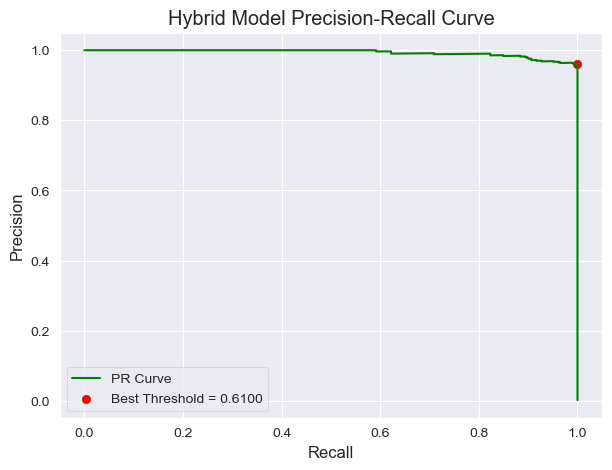

In [ ]:
# Find precision, recall và thresholds
precision, recall, thresholds = precision_recall_curve(y, hybrid_probs)

# Find F1-score for threshold
f1_scores = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1] + 1e-10)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold based on F1 for hybrid model: {best_threshold:.4f}")

# Predict labels by best threshold
hybrid_pred_labels = (hybrid_probs >= best_threshold).astype(int)

# In classification report
print("Classification Report")
print(classification_report(y, hybrid_pred_labels, digits=4))

# ROC-AUC
roc_auc = roc_auc_score(y, hybrid_probs)
print(f"ROC-AUC Score: {roc_auc:.5f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='green', label='PR Curve')
plt.scatter(recall[best_idx], precision[best_idx], color='red',
            label=f'Best Threshold = {best_threshold:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Hybrid Model Precision-Recall Curve')
plt.legend()
plt.show()

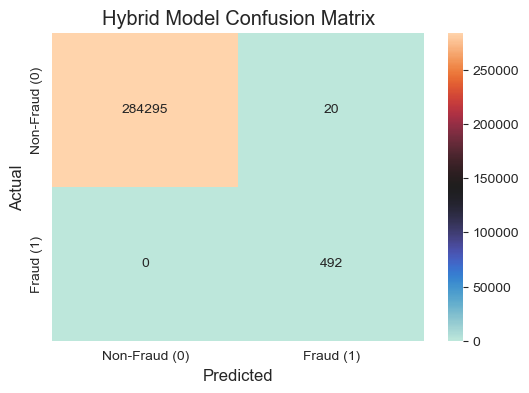

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y, hybrid_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Hybrid Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

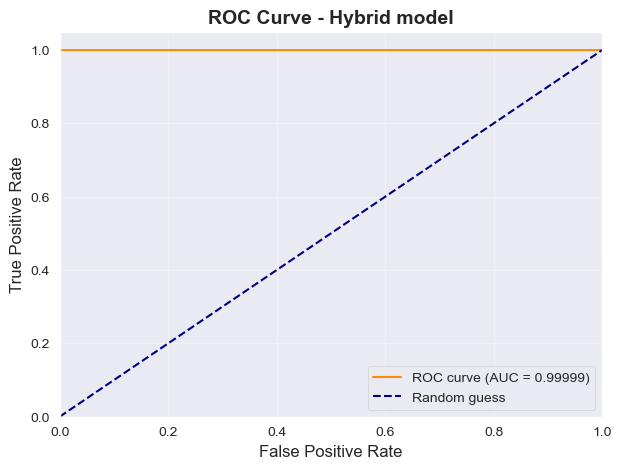

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, hybrid_probs)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Hybrid model', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## **6.2. Example of predicting a transaction with this model**

In [ ]:
# Pick a transaction from the dataframe
transaction = df.iloc[[105]].iloc[:, :-1]
print(transaction)

     Time        V1        V2        V3        V4        V5        V6  \
105  69.0 -2.220642  1.029181 -0.697724 -1.268226  2.802221  3.322901   

           V7        V8        V9  ...      V20       V21       V22       V23  \
105  0.197036 -0.521297  0.859596  ... -0.11153  0.110448 -1.178463  0.508911   

          V24       V25       V26       V27       V28  Amount  
105  0.923385  0.213759  0.033507 -0.142025 -0.263844    9.47  

[1 rows x 30 columns]


In [ ]:
def predict_transaction(transaction, scaler, iso_forest, autoencoder,
                            xgb_model, rf_model, cat_model, meta_model, best_threshold):
    # Scale
    X_scaled_new = scaler.transform(transaction)

    # Anomaly scores
    iso_score_new = -iso_forest.decision_function(X_scaled_new)[0]
    reconstruction_new = autoencoder.predict(X_scaled_new)
    ae_mse_new = np.mean(np.power(X_scaled_new - reconstruction_new, 2))

    # Supervised predictions
    xgb_pred_new = xgb_model.predict_proba(X_scaled_new)[:, 1][0]
    rf_pred_new  = rf_model.predict_proba(X_scaled_new)[:, 1][0]
    cat_pred_new = cat_model.predict_proba(X_scaled_new)[:, 1][0]

    # Hybrid vector
    hybrid_vector_new = np.array([[iso_score_new, ae_mse_new, xgb_pred_new, rf_pred_new, cat_pred_new]])

    # Meta model prediction
    prob_new = meta_model.predict_proba(hybrid_vector_new)[:, 1][0]
    label_new = int(prob_new >= best_threshold)

    return {
        "iso_score": iso_score_new,
        "ae_mse": ae_mse_new,
        "xgb_pred": xgb_pred_new,
        "rf_pred": rf_pred_new,
        "cat_pred": cat_pred_new,
        "hybrid_prob": prob_new,
        "predicted_label": label_new,
        "result": "FRAUD" if label_new==1 else "NON-FRAUD"
    }

# Usage
result = predict_transaction(transaction, scaler, iso_forest, autoencoder,
                                 xgb_model, rf_model, cat_model, meta_model, best_threshold)

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
{'iso_score': np.float64(0.007253403387947666), 'ae_mse': np.float64(0.04523819418918071), 'xgb_pred': np.float32(1.8195233e-06), 'rf_pred': np.float64(0.01), 'cat_pred': np.float64(0.00020015775559480717), 'hybrid_prob': np.float64(4.871344216687655e-05), 'predicted_label': 0, 'result': 'NON-FRAUD'}


## **6.3. Hybrid model inputs from applying Unsupervised methods with only high correlated features**

In [ ]:
# Use output from Isolation Forest
iso_imp_scores = - iso_forest_imp.decision_function(Z_scaled)

# Calculate reconstruction error for all transactions
reconstructed_imp = autoencoder_imp.predict(Z_scaled)
ae_mse_imp = np.mean(np.power(Z_scaled - reconstructed_imp, 2), axis=1)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


In [ ]:
# Combine the anomative detection score into the dataframe
df_imp_processed = pd.DataFrame(X_scaled, columns=features)
df_imp_processed['iso_imp_score'] = iso_imp_scores
df_imp_processed['ae_mse_imp'] = ae_mse_imp

# Combine the machine learning result into the dataframe
df_imp_processed['xgb_pred'] = xgb_model.predict_proba(X_all)[:, 1]
df_imp_processed['rf_pred']  = rf_model.predict_proba(X_all)[:, 1]
df_imp_processed['cat_pred'] = cat_model.predict_proba(X_all)[:, 1]

In [ ]:
df_imp_processed.head()

Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.603329  0.568680  0.827359  0.313023  0.534965  0.483822   
1  0.000000  0.913978  0.609850  0.649577  0.271796  0.576993  0.423477   
2  0.000006  0.603445  0.463820  0.788393  0.268766  0.521003  0.569201   
3  0.000006  0.637817  0.555279  0.789533  0.213661  0.568756  0.540277   
4  0.000012  0.620208  0.662831  0.774862  0.269796  0.528934  0.445914   

         V7        V8        V9  ...       V25       V26       V27       V28  \
0  0.466600  0.598640  0.475312  ...  0.585122  0.394557  0.494419  0.437517   
1  0.432795  0.596946  0.453981  ...  0.587290  0.446013  0.474206  0.443100   
2  0.509432  0.615936  0.410603  ...  0.559515  0.402727  0.467443  0.431659   
3  0.466414  0.629394  0.414999  ...  0.614245  0.389197  0.484707  0.450191   
4  0.495771  0.553269  0.490950  ...  0.566343  0.507497  0.505407  0.471486   

     Amount  iso_imp_score  ae_mse_imp      xgb_pred  rf_pred  cat_pred  
0  0.493873      -0.096648    0.008200  2.593828e-05     0.00  0.009689  
1  0.128583      -0.125139    0.004869  8.898125e-05     0.00  0.000217  
2  0.584923      -0.047575    0.012505  3.374158e-06     0.00  0.000536  
3  0.475117      -0.081274    0.008289  6.509570e-07     0.00  0.000034  
4  0.419792      -0.107677    0.008037  1.668062e-07     0.01  0.001001  

[5 rows x 35 columns]

In [ ]:
# Create hybrid features set that include the predict results
hybrid_imp_features = df_imp_processed[['iso_imp_score', 'ae_mse_imp', 'xgb_pred', 'rf_pred','cat_pred']]

# Train meta-classifier (Logistic Regression)
meta_imp_model = LogisticRegression()
meta_imp_model.fit(hybrid_imp_features, y)

LogisticRegression()

In [ ]:
# Predict probability of class 1 (fraud)
hybrid_imp_probs = meta_imp_model.predict_proba(hybrid_imp_features)[:, 1]

Best threshold based on F1 for hybrid model: 0.5970
=== Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000    284315
           1     0.9609    1.0000    0.9801       492

    accuracy                         0.9999    284807
   macro avg     0.9805    1.0000    0.9900    284807
weighted avg     0.9999    0.9999    0.9999    284807

ROC-AUC Score: 0.99999


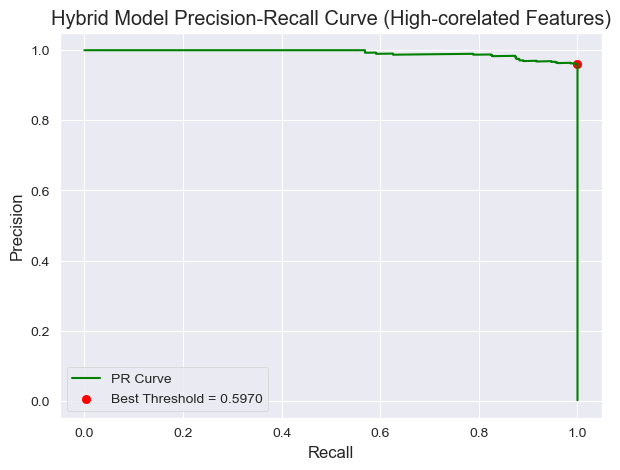

In [ ]:
# Find precision, recall và thresholds
precision, recall, thresholds = precision_recall_curve(y, hybrid_imp_probs)

# Find F1-score for threshold
f1_scores = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1] + 1e-10)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold based on F1 for hybrid model: {best_threshold:.4f}")

# Predict labels by best threshold
hybrid_imp_pred_labels = (hybrid_imp_probs >= best_threshold).astype(int)

# In classification report
print("Classification Report")
print(classification_report(y, hybrid_imp_pred_labels, digits=4))

# ROC-AUC
roc_auc_hybrid_imp = roc_auc_score(y, hybrid_imp_probs)
print(f"ROC-AUC Score: {roc_auc_hybrid_imp:.5f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='green', label='PR Curve')
plt.scatter(recall[best_idx], precision[best_idx], color='red',
            label=f'Best Threshold = {best_threshold:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Hybrid Model Precision-Recall Curve (High-corelated Features)')
plt.legend()
plt.show()

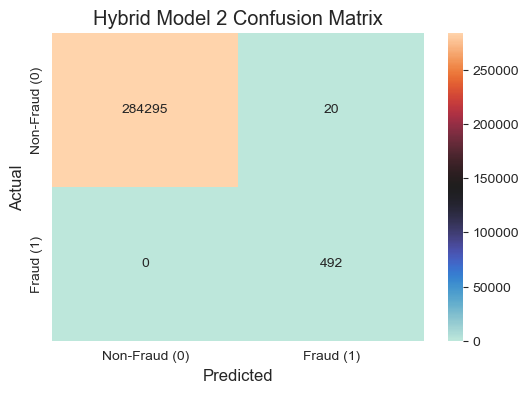

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y, hybrid_imp_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="icefire", fmt='g')

# Add labels, title, and axis ticks
plt.title('Hybrid Model 2 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

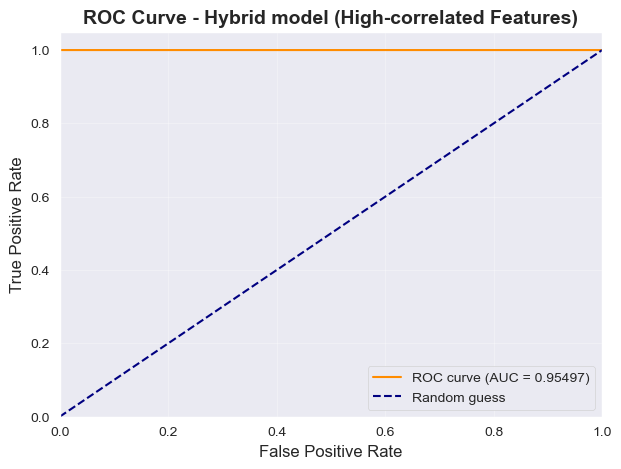

In [ ]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_all, hybrid_imp_pred_labels)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.5f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Hybrid model (High-correlated Features)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

This hybrid approach enhances adaptability, precision, and robustness, enabling the system to detect both historical and emerging fraud effectively. Since fraud detection performed better on a modified data frame with highly correlated variables, the project also tested Hybrid Model 2 using unsupervised method scores from this data frame. The result shows that this approach can increase accuracy, lower the false positive rate, increase the F1-score (0) to 1.00, and the F1-score (1) to 0.9801 with only 20 false positives. Hybrid Model 1 and 2 have the same performance, just different thresholds (0.6100 and 0.5970).

# **7. Summary and Findings**

The current project aimed to have a further understanding with real life fraud transaction data and construct, evaluate a comprehensive fraud detection framework. The analysis was conducted using the Credit Card Fraud Detection dataset, which has been used widely for testing and developing different approaches to financial fraud transactions. In the scope of these projects, our exploration data analysis (EDA) and predictive model building effort have generated new findings to this model, which lead to practical implementation and future research.
The EDA identified important behavioral and statistical differences between legitimate and fraudulent transactions. Analysing the number of transactions, the result showed that fraudulent transactions generally involved smaller amounts, but occasionally high-value outliers also appeared, reflecting that fraudsters’s strategy is to test card validity with small purchases before conducting large unauthorized ones. ‘Time’ feature further revealed that fraudulent activity is more likely to happen during off-peak hours, particularly around 2:00 am, when legitimate user activity is minimal. Correlation analysis indicated that only 11 of 30 features (V1 - V28, Amount, and Time) had an absolute correlation with fraud greater than 0.1, and none above 0.5, confirming that fraud cannot be captured through linear relationships and requires non-linear, multivariate learning techniques. The distributions of features show that most of the variables, especially higher correlated features are not normally distributed, and the fraud transactions mostly appear in different ranges or in the tails of the feature distribution. The finding suggested that we should not use Robust Scaler or Standard Scaler to preprocess this data before training the models.
The project explored the performances of anomaly detection, and machine learning algorithms for fraud detection. Testing revealed that the best unsupervised methods are Isolation Forest and Autoencoder, which yielded effective recall scores (0.85 and 0.89, respectively) but suffered from low precision and high false positive rates, indicating the need for further investigation into machine learning techniques. Supervised algorithms demonstrated superior performance with Random Forest achieving an F1-score of 0.9685 and perfect recall, alongside just 32 false positives. XGBoost and CatBoost also performed well, showcasing high precision (0.8723 and 0.8585, respectively) without false negatives. However, similar to the previous conclusion related to fraud detection in general, applying different methods can increase the performance of the model. The introduction of a hybrid model, integrating outputs from selected supervised and unsupervised models via a Logistic Regression meta-classifier, yielded the best overall performance metrics: an accuracy of 0.9999 and precision of 0.9690, with only 20 false positives. The findings emphasized the crucial role of machine learning and anomaly detection in effectively identifying fraud in financial transactions, particularly as such transactions are often minimal among a multitude of daily transactions.


# **8. Reference**

https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud#